### Preprocessing

In [ ]:
!wget https://www.dropbox.com/s/l3ivabnt9ahuize/review_data.zip

--2022-04-13 22:42:52--  https://www.dropbox.com/s/l3ivabnt9ahuize/review_data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l3ivabnt9ahuize/review_data.zip [following]
--2022-04-13 22:42:52--  https://www.dropbox.com/s/raw/l3ivabnt9ahuize/review_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc15d29f4976af371855600ce002.dl.dropboxusercontent.com/cd/0/inline/BjW5In6jEeIAHdhjItsdLsmeHEconSnxY4L16u1XB1jVaKhPsMXbovwiAiDTWMxuriQkIUau79T2gumUgJvEZetSQ3uIHwdlAm9EtlVi9kLXZJJihIH2jFO7UWPQPPExBSsgdcK5b0dLcfm1fiZZx21PSTPT0HBtNPi6UVFQrLRV5g/file# [following]
--2022-04-13 22:42:53--  https://uc15d29f4976af371855600ce002.dl.dropboxusercontent.com/cd/0/inline/BjW5In6jEeIAHdhjItsdLsmeHEconSnxY4L16u1XB1jVaKhPsMXbovwiAiD

In [ ]:
!unzip review_data.zip

Archive:  review_data.zip
   creating: review_data/
   creating: review_data/data_columns_to_use/
  inflating: review_data/data_columns_to_use/data_review5_movie_13001_to_14000.csv  
  inflating: review_data/data_movies.csv  
  inflating: review_data/data_review.csv  
  inflating: review_data/data_review1_movie_3001_to_3100.csv  
  inflating: review_data/data_review1_movie_3101_to_3200.csv  
  inflating: review_data/data_review1_movie_3201_to_3300.csv  
  inflating: review_data/data_review1_movie_3301_to_3400.csv  
  inflating: review_data/data_review1_movie_3401_to_3500.csv  
  inflating: review_data/data_review1_movie_3501_to_3600.csv  
  inflating: review_data/data_review1_movie_3601_to_3700.csv  
  inflating: review_data/data_review1_movie_3701_to_3800.csv  
  inflating: review_data/data_review1_movie_3801_to_3900.csv  
  inflating: review_data/data_review1_movie_3901_to_4000.csv  
  inflating: review_data/data_review1_movie_4001_to_4100.csv  
  inflating: review_data/data_review1_

In [ ]:
import pandas as pd
import glob

path = r'/content/gcmc/review_data/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
frame.head()

,Movie ID,Positive interact,Rating,Review date,Review text,Total interact,User ID,User link
0,tt0371128,unknown,10,9 October 2019,"I don't know much about Reggae history, but wa...",User-unknown,ur6366684,/user/ur6366684/?ref_=tt_urv
1,tt0371128,8,9,25 February 2010,"For any fan of reggae music, this documentary ...",8,ur14686564,/user/ur14686564/?ref_=tt_urv
2,tt1133559,5,4,23 February 2019,Just like DEATH IN THE CLOUDS.So l just give i...,11,ur99579942,/user/ur99579942/?ref_=tt_urv
3,tt0043307,unknown,7,4 September 2012,It's a fascinating Indian take on Gilda also b...,User-unknown,ur3212364,/user/ur3212364/?ref_=tt_urv
4,tt0043307,1,7,17 January 2007,"Though the title of the film is Baazi, meaning...",2,ur10092351,/user/ur10092351/?ref_=tt_urv


In [ ]:
frame.shape

(5948783, 7)

In [ ]:
frame = frame.drop(['User link','Review text'],axis=1)

In [ ]:
frame.dtypes

Movie ID              object
Positive interact    float64
Rating               float64
Review date           object
Total interact        object
User ID               object
dtype: object

In [ ]:
# nan_value = float("NaN")
# frame['Positive interact'] = frame['Positive interact'].replace('unknown', nan_value)
# df.replace("", nan_value, inplace=True)

frame['Positive interact'] = pd.to_numeric(frame['Positive interact'],errors='coerce')
frame['Rating'] = pd.to_numeric(frame['Rating'],errors='coerce')
frame['Total interact'] = pd.to_numeric(frame['Total interact'],errors='coerce')


In [ ]:
frame

,Movie ID,Positive interact,Rating,Review date,Total interact,User ID
0,tt0371128,NaN,10.0,9 October 2019,NaN,ur6366684
1,tt0371128,8.0,9.0,25 February 2010,8.0,ur14686564
2,tt1133559,5.0,4.0,23 February 2019,11.0,ur99579942
3,tt0043307,NaN,7.0,4 September 2012,NaN,ur3212364
4,tt0043307,1.0,7.0,17 January 2007,2.0,ur10092351
5,tt0043307,2.0,8.0,28 August 2014,2.0,ur41650708
6,tt0043307,8.0,8.0,1 August 1999,8.0,ur0204122
7,tt3401962,4.0,NaN,4 December 2018,8.0,ur60501911
8,tt3401962,0.0,6.0,16 May 2020,1.0,ur34101370
9,tt3401962,0.0,8.0,9 February 2019,0.0,ur98716024


In [ ]:
frame.isnull().sum()

Movie ID                   0
Positive interact    1303424
Rating               2296678
Review date                0
Total interact       1303424
User ID                    0
dtype: int64

In [ ]:
frame = frame.dropna()

In [ ]:
frame = frame.reset_index()
frame = frame.drop(['index'],axis=1)

In [ ]:
frame.shape

(2833179, 6)

In [ ]:
#@title function : load / save pickle_obj

### pickle
import bz2
!pip install pickle5
import pickle5
import _pickle as cPickle

def compressed_pickle(data,title):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    cPickle.dump(data, f)

def decompress_pickle(file):
 data = bz2.BZ2File(file+'.pbz2', 'rb')
 data = cPickle.load(data)
 return data

     |████████████████████████████████| 256 kB 7.7 MB/s 


In [ ]:
# compressed_pickle(frame,'preprocessed_review_data')

In [ ]:
df_movies = pd.read_csv('/content/gcmc/review_data/data_columns_to_use/data_movies.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_movies

,ID,Title,Year,Certificate,Time,Genre,IMDB rating,Number of vote,Unnamed: 8,Unnamed: 9
0,tt9288030,Reacher,(2022– ),TV-MA,49 min,"Action, Crime, Drama",8.4,46244,NaN,NaN
1,tt13668894,The Book of Boba Fett,(2021– ),TV-14,38 min,"Action, Adventure, Sci-Fi",7.6,77461,NaN,NaN
2,tt8772296,Euphoria,(2019– ),TV-MA,55 min,Drama,8.4,118954,NaN,NaN
3,tt13659418,Pam & Tommy,-2022,TV-MA,65 min,"Biography, Drama, Romance",7.5,8519,NaN,NaN
4,tt2560140,Attack on Titan,(2013–2022),TV-MA,24 min,"Animation, Action, Adventure",9.0,323058,NaN,NaN
5,tt7740496,Nightmare Alley,-2021,R,150 min,"Crime, Drama, Thriller",7.2,53316,NaN,NaN
6,tt10293406,The Power of the Dog,-2021,R,126 min,"Drama, Romance, Western",6.9,106718,NaN,NaN
7,tt5071412,Ozark,(2017–2022),TV-MA,60 min,"Crime, Drama, Thriller",8.5,252303,NaN,runtime-unknow (remove)
8,tt13146488,Peacemaker,(2022– ),TV-MA,40 min,"Action, Adventure, Comedy",8.5,39036,NaN,remove movie with runtime unknown and remove a...
9,tt13315324,The Woman in the House,-2022,TV-MA,208 min,"Comedy, Crime, Drama",6.4,25963,NaN,keep starting year as Year val


In [ ]:
df_movies = df_movies.drop(df_movies.columns[-2:],axis=1)

In [ ]:
df_movies['Time'] = df_movies['Time'].str.extract('(\d+)',expand=False)
df_movies['Year'] = df_movies['Year'].str.extract('(\d+)',expand=False)

In [ ]:
df_movies

,ID,Title,Year,Certificate,Time,Genre,IMDB rating,Number of vote
0,tt9288030,Reacher,2022,TV-MA,49,"Action, Crime, Drama",8.4,46244
1,tt13668894,The Book of Boba Fett,2021,TV-14,38,"Action, Adventure, Sci-Fi",7.6,77461
2,tt8772296,Euphoria,2019,TV-MA,55,Drama,8.4,118954
3,tt13659418,Pam & Tommy,2022,TV-MA,65,"Biography, Drama, Romance",7.5,8519
4,tt2560140,Attack on Titan,2013,TV-MA,24,"Animation, Action, Adventure",9.0,323058
5,tt7740496,Nightmare Alley,2021,R,150,"Crime, Drama, Thriller",7.2,53316
6,tt10293406,The Power of the Dog,2021,R,126,"Drama, Romance, Western",6.9,106718
7,tt5071412,Ozark,2017,TV-MA,60,"Crime, Drama, Thriller",8.5,252303
8,tt13146488,Peacemaker,2022,TV-MA,40,"Action, Adventure, Comedy",8.5,39036
9,tt13315324,The Woman in the House,2022,TV-MA,208,"Comedy, Crime, Drama",6.4,25963


In [ ]:
df_movies

,ID,Title,Year,Certificate,Time,Genre,IMDB rating,Number of vote
0,tt9288030,Reacher,2022,TV-MA,49,"Action, Crime, Drama",8.4,46244
1,tt13668894,The Book of Boba Fett,2021,TV-14,38,"Action, Adventure, Sci-Fi",7.6,77461
2,tt8772296,Euphoria,2019,TV-MA,55,Drama,8.4,118954
3,tt13659418,Pam & Tommy,2022,TV-MA,65,"Biography, Drama, Romance",7.5,8519
4,tt2560140,Attack on Titan,2013,TV-MA,24,"Animation, Action, Adventure",9.0,323058
5,tt7740496,Nightmare Alley,2021,R,150,"Crime, Drama, Thriller",7.2,53316
6,tt10293406,The Power of the Dog,2021,R,126,"Drama, Romance, Western",6.9,106718
7,tt5071412,Ozark,2017,TV-MA,60,"Crime, Drama, Thriller",8.5,252303
8,tt13146488,Peacemaker,2022,TV-MA,40,"Action, Adventure, Comedy",8.5,39036
9,tt13315324,The Woman in the House,2022,TV-MA,208,"Comedy, Crime, Drama",6.4,25963


In [ ]:
nan_movies =df_movies[df_movies.isnull().any(axis=1)]

In [ ]:
df_movies.isnull().sum()
df_movies = df_movies.dropna()

In [ ]:
df_movies = df_movies.reset_index()
df_movies = df_movies.drop(['index'],axis=1)

In [ ]:
df_movies.shape

(240620, 8)

In [ ]:
all_ID_movies_to_remove = nan_movies.ID.tolist()

In [ ]:
reviews_to_remove = frame[frame['Movie ID'].isin(all_ID_movies_to_remove)]

In [ ]:
frame.drop(frame.index[reviews_to_remove.index],axis=0,inplace=True)

In [ ]:
2833179 - len(reviews_to_remove)

2738448

In [ ]:
frame = frame.reset_index()
frame = frame.drop(['index'],axis=1)

In [ ]:
compressed_pickle(frame,'preprocessed_review_data_f')
compressed_pickle(df_movies,'preprocessed_movies_data_f')

In [ ]:
# frame.to_csv(index=True)
# df_movies.to_csv('movies_data.csv',index=False)
frame.to_csv('reviews_data.csv',index=False)

In [ ]:
df_t = pd.read_csv('/content/gcmc/reviews_data.csv')
df_t

In [ ]:
# movies_to_keep = list(set(frame['Movie ID']).intersection(set(df_movies.ID)))
# reviews_to_keep = frame[frame['Movie ID'].isin(movies_to_keep)]

## MidTerm Report Preprocessing

https://drive.google.com/drive/folders/1BGgxfhw9DgsDLUOunSoq2mr6ylYX-TqS

In [ ]:
!gdown --id 1kg_rY-w_AGSDeI5vKa5eHo0bqPfh_DWC
!gdown --id 1TVKzwerlC9KGfmrg0TZkQi-r82_4hjfJ

Downloading...
From: https://drive.google.com/uc?id=1kg_rY-w_AGSDeI5vKa5eHo0bqPfh_DWC
To: /content/data_review_test.csv
100% 72.1M/72.1M [00:01<00:00, 55.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TVKzwerlC9KGfmrg0TZkQi-r82_4hjfJ
To: /content/data_movie_test.csv
100% 8.50k/8.50k [00:00<00:00, 9.36MB/s]


In [ ]:
import pandas as pd

In [ ]:
review_test = pd.read_csv("/content/data_review_test.csv")
movie_test = pd.read_csv("/content/data_movie_test.csv")

In [ ]:
review_test.head()

,Movie ID,User ID,Rating,Review date,Review text,Positive interact,Total interact
0,tt9288030,ur13977076,9.0,09-Feb-22,Jack Reacher is a former major in the military...,92,129
1,tt9288030,ur0438066,NaN,07-Feb-22,"New TV series streaming from Amazon, my wife a...",89,117
2,tt9288030,ur2767381,NaN,09-Feb-22,"If not spectacular, ""Reacher"" was an eminently...",39,51
3,tt9288030,ur44112735,7.0,09-Feb-22,1. Lee Child is to 2020 what Mickey Spillaine ...,36,113
4,tt9288030,ur64264987,6.0,06-Feb-22,"A solid show, I like it. I wouldn't compare Re...",64,122


In [ ]:
review_test.head()

,Movie ID,User ID,Rating,Review date,Review text,Positive interact,Total interact
0,tt9288030,ur13977076,9.0,09-Feb-22,Jack Reacher is a former major in the military...,92,129
3,tt9288030,ur44112735,7.0,09-Feb-22,1. Lee Child is to 2020 what Mickey Spillaine ...,36,113
4,tt9288030,ur64264987,6.0,06-Feb-22,"A solid show, I like it. I wouldn't compare Re...",64,122
5,tt9288030,ur29500838,8.0,15-Feb-22,Reacher is a quality series that I look forwar...,31,38
6,tt9288030,ur3580907,6.0,18-Feb-22,"A big reason you may watch, or not, is if you ...",15,27


In [ ]:
review_test.columns

Index(['Movie ID', 'User ID', 'Rating', 'Review date', 'Review text',
       'Positive interact', 'Total interact'],
      dtype='object')

In [ ]:
movie_test

,ID,Title,Year,Certificate,Time,Genre,IMDB rating,Metascore,Number of vote
0,tt9288030,Reacher,(2022– ),TV-MA,49 min,"Action, Crime, Drama",8.4,-1,46244
1,tt13668894,The Book of Boba Fett,(2021– ),TV-14,38 min,"Action, Adventure, Sci-Fi",7.6,-1,77461
2,tt8772296,Euphoria,(2019– ),TV-MA,55 min,Drama,8.4,-1,118954
3,tt13659418,Pam & Tommy,-2022,TV-MA,65 min,"Biography, Drama, Romance",7.5,-1,8519
4,tt2560140,Attack on Titan,(2013–2022),TV-MA,24 min,"Animation, Action, Adventure",9.0,-1,323058
...,...,...,...,...,...,...,...,...,...
95,tt0108778,Friends,(1994–2004),TV-14,22 min,"Comedy, Romance",8.8,-1,935286
96,tt5171438,Star Trek: Discovery,(2017– ),TV-14,60 min,"Action, Adventure, Drama",7.1,-1,112597
97,tt11126994,Arcane,(2021– ),TV-14,41 min,"Animation, Action, Adventure",9.1,-1,155628
98,tt2463208,The Adam Project,-2022,No-certificate,106 min,"Action, Adventure, Comedy",-1.0,-1,-1


In [ ]:
movie_test.columns

Index(['ID', 'Title', 'Year', 'Certificate', 'Time', 'Genre', 'IMDB rating',
       'Metascore', 'Number of vote'],
      dtype='object')

In [ ]:
movie_test.head()

,ID,Title,Year,Certificate,Time,Genre,IMDB rating,Metascore,Number of vote
0,tt9288030,Reacher,(2022– ),TV-MA,49 min,"Action, Crime, Drama",8.4,-1,46244
1,tt13668894,The Book of Boba Fett,(2021– ),TV-14,38 min,"Action, Adventure, Sci-Fi",7.6,-1,77461
2,tt8772296,Euphoria,(2019– ),TV-MA,55 min,Drama,8.4,-1,118954
3,tt13659418,Pam & Tommy,-2022,TV-MA,65 min,"Biography, Drama, Romance",7.5,-1,8519
4,tt2560140,Attack on Titan,(2013–2022),TV-MA,24 min,"Animation, Action, Adventure",9.0,-1,323058


In [ ]:
review_test.isnull().sum()
# review_test = review_test.dropna()

Movie ID                0
User ID                 0
Rating               2735
Review date             0
Review text             0
Positive interact       0
Total interact          0
dtype: int64

In [ ]:
review_test.describe()

,Rating
count,101826.000000
mean,7.015851
std,3.189774
min,1.000000
25%,5.000000
50%,8.000000
75%,10.000000
max,10.000000


In [ ]:
grp = review_test.groupby(['Movie ID'])
grp.describe()

Rating                                                
            count      mean       std  min  25%   50%   75%   max
Movie ID                                                         
tt0098904   374.0  8.422460  2.886249  1.0  9.0  10.0  10.0  10.0
tt0108778  1488.0  8.672715  2.721260  1.0  9.0  10.0  10.0  10.0
tt0364845   345.0  7.101449  3.028666  1.0  5.0   8.0  10.0  10.0
tt0386676  1449.0  8.568668  2.561861  1.0  8.0  10.0  10.0  10.0
tt0413573   625.0  6.134400  3.465191  1.0  3.0   7.0  10.0  10.0
...           ...       ...       ...  ...  ...   ...   ...   ...
tt9100054   683.0  4.316252  2.768086  1.0  2.0   4.0   7.0  10.0
tt9170108  1223.0  6.098119  3.110384  1.0  3.0   6.0   9.0  10.0
tt9288030  1319.0  7.739196  2.581933  1.0  7.0   9.0  10.0  10.0
tt9335498   423.0  8.602837  2.212243  1.0  8.0  10.0  10.0  10.0
tt9620288   375.0  7.581333  2.306274  1.0  7.0   8.0   9.0  10.0

[94 rows x 8 columns]

In [ ]:
grp = review_test.groupby(['User ID'])
grp.describe()

Rating                                                     
            count       mean       std   min    25%   50%    75%   max
User ID                                                               
ur0000039     3.0   6.666667  1.527525   5.0   6.00   7.0   7.50   8.0
ur0000554     1.0   2.000000       NaN   2.0   2.00   2.0   2.00   2.0
ur0001414     1.0   1.000000       NaN   1.0   1.00   1.0   1.00   1.0
ur0003394     1.0   2.000000       NaN   2.0   2.00   2.0   2.00   2.0
ur0005590     2.0   5.500000  6.363961   1.0   3.25   5.5   7.75  10.0
...           ...        ...       ...   ...    ...   ...    ...   ...
ur99990800    1.0  10.000000       NaN  10.0  10.00  10.0  10.00  10.0
ur99991825    1.0  10.000000       NaN  10.0  10.00  10.0  10.00  10.0
ur99991963    1.0   8.000000       NaN   8.0   8.00   8.0   8.00   8.0
ur99996625    1.0  10.000000       NaN  10.0  10.00  10.0  10.00  10.0
ur99996866    1.0   9.000000       NaN   9.0   9.00   9.0   9.00   9.0

[78201 rows x 8 columns]

In [ ]:
review_test.corr()

,Movie ID,User ID,Rating,Review date,Review text,Positive interact,Total interact
0,tt9288030,ur13977076,9.0,09-Feb-22,Jack Reacher is a former major in the military...,92,129
3,tt9288030,ur44112735,7.0,09-Feb-22,1. Lee Child is to 2020 what Mickey Spillaine ...,36,113
4,tt9288030,ur64264987,6.0,06-Feb-22,"A solid show, I like it. I wouldn't compare Re...",64,122
5,tt9288030,ur29500838,8.0,15-Feb-22,Reacher is a quality series that I look forwar...,31,38
6,tt9288030,ur3580907,6.0,18-Feb-22,"A big reason you may watch, or not, is if you ...",15,27
...,...,...,...,...,...,...,...
104556,tt2861424,ur95714043,3.0,08-Apr-20,Rick and Morty; it revolves around a sociopath...,5,21
104557,tt2861424,ur95851563,10.0,06-Sep-19,"1.We need more episodes,I mean it.\n2.You need...",2,5
104558,tt2861424,ur95981810,10.0,23-Apr-19,This tv series one of the best you know every ...,1,3
104559,tt2861424,ur96775113,10.0,11-Nov-19,.... Rick & Morty (burrrp) has been my favorit...,11,20


In [ ]:
review_test.corr()

,Rating
Rating,1.0


In [ ]:
movie_test.isnull().sum()
movie_test = movie_test.dropna()

In [ ]:
movie_test

,ID,Title,Year,Certificate,Time,Genre,IMDB rating,Metascore,Number of vote
0,tt9288030,Reacher,(2022– ),TV-MA,49 min,"Action, Crime, Drama",8.4,-1,46244
1,tt13668894,The Book of Boba Fett,(2021– ),TV-14,38 min,"Action, Adventure, Sci-Fi",7.6,-1,77461
2,tt8772296,Euphoria,(2019– ),TV-MA,55 min,Drama,8.4,-1,118954
3,tt13659418,Pam & Tommy,-2022,TV-MA,65 min,"Biography, Drama, Romance",7.5,-1,8519
4,tt2560140,Attack on Titan,(2013–2022),TV-MA,24 min,"Animation, Action, Adventure",9.0,-1,323058
...,...,...,...,...,...,...,...,...,...
95,tt0108778,Friends,(1994–2004),TV-14,22 min,"Comedy, Romance",8.8,-1,935286
96,tt5171438,Star Trek: Discovery,(2017– ),TV-14,60 min,"Action, Adventure, Drama",7.1,-1,112597
97,tt11126994,Arcane,(2021– ),TV-14,41 min,"Animation, Action, Adventure",9.1,-1,155628
98,tt2463208,The Adam Project,-2022,No-certificate,106 min,"Action, Adventure, Comedy",-1.0,-1,-1


In [ ]:
movie_test.corr()

,IMDB rating,Metascore,Number of vote
IMDB rating,1.000000,0.044137,0.319475
Metascore,0.044137,1.000000,-0.161168
Number of vote,0.319475,-0.161168,1.000000


# GCMC : DGL

In [ ]:
!pip install dgl-cu111 dglgo -f https://data.dgl.ai/wheels/repo.html

In [ ]:
# %cd /content/
%mkdir gcmc_pytorch
%cd ./gcmc_pytorch
!wget https://raw.githubusercontent.com/dmlc/dgl/master/examples/pytorch/gcmc/data.py
!wget https://raw.githubusercontent.com/dmlc/dgl/master/examples/pytorch/gcmc/model.py
!wget https://raw.githubusercontent.com/dmlc/dgl/master/examples/pytorch/gcmc/train.py
!wget https://raw.githubusercontent.com/dmlc/dgl/master/examples/pytorch/gcmc/train_sampling.py
!wget https://raw.githubusercontent.com/dmlc/dgl/master/examples/pytorch/gcmc/utils.py

/home/grad16/sakumar/colab/CS79/project/gcmc_pytorch
--2022-04-25 15:59:51--  https://raw.githubusercontent.com/dmlc/dgl/master/examples/pytorch/gcmc/data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24954 (24K) [text/plain]
Saving to: ‘data.py’

data.py             100%[===================>]  24.37K  --.-KB/s    in 0.002s  

2022-04-25 15:59:51 (10.2 MB/s) - ‘data.py’ saved [24954/24954]

--2022-04-25 15:59:51--  https://raw.githubusercontent.com/dmlc/dgl/master/examples/pytorch/gcmc/model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response..

In [ ]:
%cd ./gcmc_pytorch

/home/grad16/sakumar/colab/CS79/project/gcmc_pytorch


In [ ]:
## Movielens 100k
!python3 train.py --data_name=ml-100k --use_one_hot_fea --gcn_agg_accum=stack

# ml-100k
# Best Iter Idx=1211, Best Valid RMSE=0.8868, Best Test RMSE=0.9098, Total Time=16.1553

Namespace(data_name='ml-100k', data_test_ratio=0.1, data_valid_ratio=0.1, device=device(type='cuda', index=0), gcn_agg_accum='stack', gcn_agg_norm_symm=True, gcn_agg_units=500, gcn_dropout=0.7, gcn_out_units=75, gen_r_num_basis_func=2, model_activation='leaky', save_dir='log/ml-100k_YO', save_id=5, seed=123, share_param=False, silent=False, train_decay_patience=50, train_early_stopping_patience=100, train_grad_clip=1.0, train_log_interval=1, train_lr=0.01, train_lr_decay_factor=0.5, train_max_iter=2000, train_min_lr=0.001, train_optimizer='adam', train_valid_interval=1, use_one_hot_fea=True)
Starting processing ml-100k ...
......
......
All rating pairs : 100000
	All train rating pairs : 80000
		Train rating pairs : 72000
		Valid rating pairs : 8000
	Test rating pairs  : 20000
Total user number = 943, movie number = 1682
Feature dim: 
user: (943, 943)
movie: (1682, 1682)
Train enc graph: 	#user:943	#movie:1682	#pairs:72000
Train dec graph: 	#user:943	#movie:1682	#pairs:72000
Valid enc 

In [ ]:
## Movielens 100k no side features
!python3 train.py --data_name=ml-100k --use_one_hot_fea --gcn_agg_accum=stack

# ml-100k
# Best Iter Idx=674, Best Valid RMSE=0.8881, Best Test RMSE=0.9119, Total Time=8.9384

Namespace(data_name='ml-100k', data_test_ratio=0.1, data_valid_ratio=0.1, device=device(type='cuda', index=0), gcn_agg_accum='stack', gcn_agg_norm_symm=True, gcn_agg_units=500, gcn_dropout=0.7, gcn_out_units=75, gen_r_num_basis_func=2, model_activation='leaky', save_dir='log/ml-100k_MU', save_id=9, seed=123, share_param=False, silent=False, train_decay_patience=50, train_early_stopping_patience=100, train_grad_clip=1.0, train_log_interval=1, train_lr=0.01, train_lr_decay_factor=0.5, train_max_iter=2000, train_min_lr=0.001, train_optimizer='adam', train_valid_interval=1, use_one_hot_fea=True)
Starting processing ml-100k ...
......
......
All rating pairs : 100000
	All train rating pairs : 80000
		Train rating pairs : 72000
		Valid rating pairs : 8000
	Test rating pairs  : 20000
Total user number = 943, movie number = 1682
Feature dim: 
user: (943, 943)
movie: (1682, 1682)
Train enc graph: 	#user:943	#movie:1682	#pairs:72000
Train dec graph: 	#user:943	#movie:1682	#pairs:72000
Valid enc 

In [ ]:
!wget -N -c https://www.dropbox.com/sh/keg7kztsdo15126/AACCTbGxyhv8s4UE9Cst_KFka/movies_data.csv
!wget -N -c https://www.dropbox.com/sh/keg7kztsdo15126/AACP4eibezNNlRNGB2jqdCvAa/reviews_data.csv

--2022-04-25 18:07:44--  https://www.dropbox.com/sh/keg7kztsdo15126/AACCTbGxyhv8s4UE9Cst_KFka/movies_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/keg7kztsdo15126/AACCTbGxyhv8s4UE9Cst_KFka/movies_data.csv [following]
--2022-04-25 18:07:44--  https://www.dropbox.com/sh/raw/keg7kztsdo15126/AACCTbGxyhv8s4UE9Cst_KFka/movies_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce13260fec01a72d6a011bb66ec.dl.dropboxusercontent.com/cd/0/inline/BkHpfizVikvtndMNKI4224vVbO9Uetbz1nRtJ0a-v5bqay9hQld1PRSJO9lA0fxnYo4e7ujcCBWa_1fstKMgHR3k19KD1YkmT17RcWEzTKooNO99VQknJVhkrgaT1rdhIVYtzuP9C45sNRU2NmFRp18YfacNsNg4sjubDa4uRWASXw/file# [following]
--2022-04-25 18:07:44--  https://uce13260fec01a72d6a011bb66ec.dl.dropboxuserco

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
#@title function : load / save pickle_obj

### pickle
import bz2
!pip install pickle5
import pickle5
import _pickle as cPickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

def load_obj_pkl5(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle5.load(f)

def compressed_pickle(data,title):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    cPickle.dump(data, f)

def decompress_pickle(file):
 data = bz2.BZ2File(file+'.pbz2', 'rb')
 data = cPickle.load(data)
 return data

In [ ]:
# imdb_final_answer.pkl
# imdb_final_ratings.csv

imdb_final_ratings = pd.read_csv('imdb_final_ratings.csv')
imdb_final_answer = load_obj_pkl5('imdb_final_answer')

In [ ]:
imdb_final_answer

array([ 8.,  9., 10., ...,  1.,  8.,  7.])

In [ ]:
# %cd /content/gcmc_pytorch/ml-100k
# !rm -r *
# %cd /content/gcmc_pytorch/

/content/gcmc_pytorch


In [ ]:
# !wget http://files.grouplens.org/datasets/movielens/ml-100k.zip
# !unzip ml-100k.zip

In [ ]:
# def filter_rows_by_values(df, col, values):
#     return df[~df[col].isin(values)]
# df_reviews_all = filter_rows_by_values(df_reviews_all,'Rating',10)
np.random.seed(2022)
df_reviews_all = pd.read_csv('reviews_data.csv')
df_reviews_all = df_reviews_all[df_reviews_all.Rating <=10.0]
df_reviews = df_reviews_all.sample(100000)
df_movies = pd.read_csv('movies_data.csv')

/home/grad16/sakumar/miniconda3/envs/cuda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df_movies

,ID,Title,Year,Certificate,Time,Genre,IMDB rating,Number of vote
0,tt9288030,Reacher,2022,TV-MA,49,"Action, Crime, Drama",8.4,46244
1,tt13668894,The Book of Boba Fett,2021,TV-14,38,"Action, Adventure, Sci-Fi",7.6,77461
2,tt8772296,Euphoria,2019,TV-MA,55,Drama,8.4,118954
3,tt13659418,Pam & Tommy,2022,TV-MA,65,"Biography, Drama, Romance",7.5,8519
4,tt2560140,Attack on Titan,2013,TV-MA,24,"Animation, Action, Adventure",9.0,323058
...,...,...,...,...,...,...,...,...
240615,tt10214908,Hai Golmaal in White House,2015,Not Rated,125,Comedy,2.7,8
240616,tt16367992,Static Shock: Origin I,2021,No-certificate,9,"Short, Action, Drama",-1.0,-1
240617,tt0036060,Jungle Drums,1943,Approved,8,"Animation, Short, Action",6.5,603
240618,tt3717634,Dónde Nace El Sol,2013,No-certificate,85,History,-1.0,-1


In [ ]:
df_reviews_all

,Movie ID,Positive interact,Rating,Review date,Total interact,User ID
0,tt0371128,8.0,9.0,25 February 2010,8.0,ur14686564
1,tt1133559,5.0,4.0,23 February 2019,11.0,ur99579942
2,tt0043307,1.0,7.0,17 January 2007,2.0,ur10092351
3,tt0043307,2.0,8.0,28 August 2014,2.0,ur41650708
4,tt0043307,8.0,8.0,1 August 1999,8.0,ur0204122
...,...,...,...,...,...,...
2738443,tt0066975,3.0,10.0,18 July 2013,3.0,ur45182021
2738444,tt2923780,12.0,6.0,8 November 2014,21.0,ur41972501
2738445,tt2923780,4.0,8.0,10 June 2018,5.0,ur19738042
2738446,tt2923780,10.0,8.0,17 September 2016,14.0,ur3703068


In [ ]:
data_columns = ['User ID','Movie ID']
data = df_reviews[data_columns].to_dict(orient ='records')

userIDs,itemIDs = {},{}

for d in data:
    u,i = d['User ID'],d['Movie ID']
    if not u in userIDs: userIDs[u] = len(userIDs)
    if not i in itemIDs: itemIDs[i] = len(itemIDs)

nUsers,nItems = len(userIDs),len(itemIDs)

df_reviews['user_id'] = df_reviews['User ID'].apply(lambda x: userIDs[x])
df_reviews['movie_id']= df_reviews['Movie ID'].apply(lambda x: itemIDs[x])

df_reviews = df_reviews.rename(columns={
                   'Rating':'rating',
                   'Review date':'time'})

df_reviews.replace([np.inf, -np.inf], np.nan, inplace=True)
df_reviews.isnull().sum()
df_reviews = df_reviews.dropna()
df_reviews['rating'] = df_reviews['rating'].astype('int')

def data_conv(s):
  if '-' in s:
    try:
      dt = datetime.strptime(s, '%d-%B-%Y').strftime('%Y%m%d')
    except:
      try :
        dt = datetime.strptime(s, '%d-%B-%y').strftime('%Y%m%d')
      except:
        try:
          dt = datetime.strptime(s, '%d-%b-%y').strftime('%Y%m%d')
        except:
          print(s)
  else:
      dt = datetime.strptime(s, '%d %B %Y').strftime('%Y%m%d')
  return dt

df_reviews['time'] = df_reviews['time'].apply(lambda s: data_conv(s))
df_reviews_f = df_reviews[['user_id','movie_id','rating','time']]
# df_reviews_f = df_reviews_f.head(100000)
df_reviews_f.to_csv('final_df.csv',sep='\t',header=None,index=False)

In [ ]:
df_reviews

,Movie ID,Positive interact,rating,time,Total interact,User ID,user_id,movie_id
1410824,tt1362118,0.0,8,20190912,0.0,ur17559480,0,0
1655370,tt4479380,13.0,10,20210314,33.0,ur84183339,1,1
2093842,tt6578228,7.0,8,20180406,11.0,ur70429450,2,2
1588465,tt0023007,7.0,6,20140327,7.0,ur0568099,3,3
2064373,tt12800524,11.0,7,20211217,18.0,ur55939461,4,4
...,...,...,...,...,...,...,...,...
1056270,tt0264013,11.0,9,20050110,14.0,ur4553194,72576,39623
72520,tt11260832,0.0,1,20210826,1.0,ur123734726,72577,649
1229878,tt8945942,29.0,7,20200906,60.0,ur82461534,72578,10405
299536,tt0067866,0.0,4,20200421,3.0,ur64520726,72579,30686


In [ ]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [ ]:
df_movies['year'] = pd.factorize(df_movies['Year'])[0]
df_movies['certificate'] = pd.factorize(df_movies['Certificate'])[0]

In [ ]:
item_old_cols = ['Genre','IMDB rating','Number of vote','Time','year','certificate']
item_new_cols = ['genre','imdb_rating','nVotes','runtime','year','certificate']

for col,newcol in zip(item_old_cols,item_new_cols):
  movies_to_review_dict = pd.Series(df_movies[col].values,index=df_movies['ID']).to_dict()
  df_reviews[newcol] = df_reviews['Movie ID'].apply(lambda x: movies_to_review_dict[x])

In [ ]:
df_reviews

,Movie ID,Positive interact,rating,time,Total interact,User ID,user_id,movie_id,genre,imdb_rating,nVotes,runtime,year,certificate
1410824,tt1362118,0.0,8,20190912,0.0,ur17559480,0,0,"Crime, Drama",6.2,968,104,19,6
1655370,tt4479380,13.0,10,20210314,33.0,ur84183339,1,1,"Action, Thriller",5.2,16988,124,1,2
2093842,tt6578228,7.0,8,20180406,11.0,ur70429450,2,2,"Horror, Mystery",3.4,447,99,5,6
1588465,tt0023007,7.0,6,20140327,7.0,ur0568099,3,3,Comedy,6.6,579,73,88,9
2064373,tt12800524,11.0,7,20211217,18.0,ur55939461,4,4,"Sci-Fi, Thriller",5.8,8270,108,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056270,tt0264013,11.0,9,20050110,14.0,ur4553194,72576,39623,"Documentary, Biography",7.6,700,48,26,6
72520,tt11260832,0.0,1,20210826,1.0,ur123734726,72577,649,"Action, Thriller",6.2,21256,123,1,6
1229878,tt8945942,29.0,7,20200906,60.0,ur82461534,72578,10405,"Drama, Thriller",4.4,3766,89,15,5
299536,tt0067866,0.0,4,20200421,3.0,ur64520726,72579,30686,"Drama, Western",7.4,28479,125,68,13


In [ ]:
all_genres = df_reviews.genre.tolist()
all_genres = [g.split(',') for g in all_genres]
all_genres = [[a.strip() for a in g] for g in all_genres]

distinct_genres = list(set(flatten(all_genres)))
distinct_genres.sort()

genre_vecs = []
for ag in range(len(all_genres)):
  genre_vec = [0]*(len(distinct_genres))
  for g in all_genres[ag]:
    if g in distinct_genres:
      genre_vec[distinct_genres.index(g)] = 1
  genre_vecs.append(genre_vec)

df_reviews[distinct_genres] = genre_vecs

In [ ]:
# imdb_final_answer.pkl
# imdb_final_ratings.csv

In [ ]:
df_reviews

,Movie ID,Positive interact,rating,time,Total interact,User ID,user_id,movie_id,genre,imdb_rating,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
1410824,tt1362118,0.0,8,20190912,0.0,ur17559480,0,0,"Crime, Drama",6.2,...,0,0,0,0,0,0,0,0,0,0
1655370,tt4479380,13.0,10,20210314,33.0,ur84183339,1,1,"Action, Thriller",5.2,...,0,0,0,0,0,0,0,1,0,0
2093842,tt6578228,7.0,8,20180406,11.0,ur70429450,2,2,"Horror, Mystery",3.4,...,0,0,0,0,0,0,0,0,0,0
1588465,tt0023007,7.0,6,20140327,7.0,ur0568099,3,3,Comedy,6.6,...,0,0,0,0,0,0,0,0,0,0
2064373,tt12800524,11.0,7,20211217,18.0,ur55939461,4,4,"Sci-Fi, Thriller",5.8,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056270,tt0264013,11.0,9,20050110,14.0,ur4553194,72576,39623,"Documentary, Biography",7.6,...,0,0,0,0,0,0,0,0,0,0
72520,tt11260832,0.0,1,20210826,1.0,ur123734726,72577,649,"Action, Thriller",6.2,...,0,0,0,0,0,0,0,1,0,0
1229878,tt8945942,29.0,7,20200906,60.0,ur82461534,72578,10405,"Drama, Thriller",4.4,...,0,0,0,0,0,0,0,1,0,0
299536,tt0067866,0.0,4,20200421,3.0,ur64520726,72579,30686,"Drama, Western",7.4,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# imdb_final_answer.pkl
# imdb_final_ratings.csv
# idx_to_remove = list(imdb_final_ratings[imdb_final_ratings['item_id'].isin(a)].index)
idx_to_remove = [7137,7138,7139,7140,7141,7142,7143,7144,7145,7146,7147,7148,7149,7150,7151,7152,7153,7154,7155,7156,7157,7158,7159,7160,7161,7162,7163,7164,7165,7166,7167,7168,7169,7170,7171,7172,63284,63285,63286,63287,63288,63289,63290,63291,81995,81996]
imdb_final_ratings = pd.read_csv('imdb_final_ratings.csv')
imdb_final_answer = load_obj_pkl5('imdb_final_answer')
imdb_final_answer = np.delete(imdb_final_answer, idx_to_remove)

In [ ]:
imdb_final_answer.shape

(83589,)

In [ ]:
a = [579, 13878, 25183]
imdb_final_ratings = imdb_final_ratings[~imdb_final_ratings['item_id'].isin(a)]
# df_reviews.columns[2:]
df_reviews = imdb_final_ratings.drop([imdb_final_ratings.columns[0]],axis=1).reset_index(drop=True)
df_reviews = df_reviews.rename(columns={"item_id":"movie_id"})

In [ ]:
df_reviews

,user_id,movie_id,Year,Certificate,Time,imdb_rating,num_votes,Action,Adult,Adventure,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,88,16,116,6.8,3830,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,113,11,25,9.6,112610,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,113,11,25,9.6,112610,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,113,11,25,9.6,112610,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,113,11,25,9.6,112610,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83584,62512,26746,64,13,102,8.0,4549,0,0,0,...,0,0,0,0,0,0,0,0,0,1
83585,62513,26747,100,11,145,7.7,21797,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83586,62514,26748,111,16,99,4.5,640,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83587,7838,26749,40,15,110,7.0,3018,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_reviews_f = df_reviews[['user_id','movie_id','Time']]
df_reviews_f['rating'] = imdb_final_answer.astype('int')
df_reviews_f = df_reviews_f[['user_id','movie_id','rating','Time']]

<ipython-input-110-d33432eacd0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_f['rating'] = imdb_final_answer.astype('int')


In [ ]:
df_reviews_f

,user_id,movie_id,rating,Time
0,0,0,8,116
1,1,1,9,25
2,2,1,10,25
3,3,1,10,25
4,4,1,10,25
...,...,...,...,...
83584,62512,26746,3,102
83585,62513,26747,1,145
83586,62514,26748,1,99
83587,7838,26749,8,110


In [ ]:
user_info = ['user_id']
user_df = df_reviews[user_info].astype('int').drop_duplicates().reset_index(drop=True)

# user_df = user_df.rename(columns={
#                    'user_id':'id'})

In [ ]:
user_df

,user_id
0,0
1,1
2,2
3,3
4,4
...,...
62489,62510
62490,62511
62491,62512
62492,62513


In [ ]:
user_df['user_id'].unique(),user_df['user_id'].unique().shape

(array([    0,     1,     2, ..., 62512, 62513, 62514]), (62494,))

In [ ]:
df_reviews['movie_id'].unique(),df_reviews['movie_id'].unique().shape

(array([    0,     1,     2, ..., 26748, 26749, 26750]), (26748,))

In [ ]:
## DANG's data
item_info = list(df_reviews.columns[1:])
#

# item_info = ['movie_id','imdb_rating','nVotes','runtime','year','certificate'] + distinct_genres
# ['movie_id',imdb_rating','nVotes','runtime'] + ['Action','Adult','Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy','Film-Noir','Game-Show','History','Horror','Music','Musical','Mystery','News','Reality-TV','Romance','Sci-Fi','Short','Sport','Talk-Show','Thriller','War','Western']
item_df = df_reviews[item_info].drop_duplicates().reset_index(drop=True)

item_df__no_side = df_reviews[[item_info[0]]].drop_duplicates().reset_index(drop=True)

# item_df = item_df.rename(columns={
#                    'movie_id':'id'})

In [ ]:
item_df

,movie_id,Year,Certificate,Time,imdb_rating,num_votes,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,88,16,116,6.8,3830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,113,11,25,9.6,112610,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,97,11,124,7.6,16588,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,111,14,101,6.8,53330,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4,50,18,30,7.4,985,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26743,26746,64,13,102,8.0,4549,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26744,26747,100,11,145,7.7,21797,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26745,26748,111,16,99,4.5,640,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26746,26749,40,15,110,7.0,3018,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# some movie_ids duplicate
# item_df = item_df.drop_duplicates(subset='movie_id', keep="first").reset_index(drop=True)

In [ ]:
# ids = item_df["movie_id"]
# remove_mids = item_df[ids.isin(ids[ids.duplicated()])]['movie_id'].values

In [ ]:
item_df__no_side

,movie_id
0,0
1,1
2,2
3,3
4,4
...,...
26743,26746
26744,26747
26745,26748
26746,26749


In [ ]:
from sklearn.model_selection import train_test_split
train_df , test_df  = train_test_split(df_reviews_f,test_size=0.25)

In [ ]:
# !rm -r *.pbz2

In [ ]:
compressed_pickle(train_df,'train_df_imdb')
compressed_pickle(test_df,'test_df_imdb')
compressed_pickle(df_reviews_f,'df_reviews_f_imdb')
compressed_pickle(user_df,'user_df_imdb')
compressed_pickle(item_df,'item_df_imdb')
compressed_pickle(item_df__no_side,'item_df__no_side_imdb')

In [ ]:
## DANG imdb 100k (no side features)
!python3 train.py --data_name=imdb --use_one_hot_fea --gcn_agg_accum=stack


Namespace(data_name='imdb', data_test_ratio=0.1, data_valid_ratio=0.1, device=device(type='cuda', index=0), gcn_agg_accum='stack', gcn_agg_norm_symm=True, gcn_agg_units=500, gcn_dropout=0.7, gcn_out_units=75, gen_r_num_basis_func=2, model_activation='leaky', save_dir='log/imdb_X8', save_id=10, seed=123, share_param=False, silent=False, train_decay_patience=50, train_early_stopping_patience=100, train_grad_clip=1.0, train_log_interval=1, train_lr=0.01, train_lr_decay_factor=0.5, train_max_iter=2000, train_min_lr=0.001, train_optimizer='adam', train_valid_interval=1, use_one_hot_fea=True)
Starting processing imdb ...
......
......
All rating pairs : 83589
	All train rating pairs : 62691
		Train rating pairs : 56421
		Valid rating pairs : 6270
	Test rating pairs  : 20898
Total user number = 62494, movie number = 26748
hello
Feature dim: 
user: (62494, 62494)
movie: (26748, 26748)
112842
125382
Train enc graph: 	#user:62494	#movie:26748	#pairs:56421
Train dec graph: 	#user:62494	#movie:267

In [ ]:
## DANG imdb 100k (side features)
!python3 train.py --data_name=imdb --use_one_hot_fea --gcn_agg_accum=stack

# Best Iter Idx=109, Best Valid RMSE=3.0829, Best Test RMSE=3.0741, Total Time=19.6654

Namespace(data_name='imdb', data_test_ratio=0.1, data_valid_ratio=0.1, device=device(type='cuda', index=0), gcn_agg_accum='stack', gcn_agg_norm_symm=True, gcn_agg_units=500, gcn_dropout=0.7, gcn_out_units=75, gen_r_num_basis_func=2, model_activation='leaky', save_dir='log/imdb_I6', save_id=15, seed=123, share_param=False, silent=False, train_decay_patience=50, train_early_stopping_patience=100, train_grad_clip=1.0, train_log_interval=1, train_lr=0.01, train_lr_decay_factor=0.5, train_max_iter=2000, train_min_lr=0.001, train_optimizer='adam', train_valid_interval=1, use_one_hot_fea=True)
Starting processing imdb ...
......
......
All rating pairs : 83589
	All train rating pairs : 62691
		Train rating pairs : 56421
		Valid rating pairs : 6270
	Test rating pairs  : 20898
Total user number = 62494, movie number = 26748
hello
Feature dim: 
user: (62494, 62494)
movie: (26748, 26748)
112842
125382
Train enc graph: 	#user:62494	#movie:26748	#pairs:56421
Train dec graph: 	#user:62494	#movie:267

In [ ]:
## imdb 100k (side features)
!python3 train.py --data_name=imdb --use_one_hot_fea --gcn_agg_accum=stack

# Best Iter Idx=34, Best Valid RMSE=2.9031, Best Test RMSE=2.9494, Total Time=19.1581

Namespace(data_name='imdb', data_test_ratio=0.1, data_valid_ratio=0.1, device=device(type='cuda', index=0), gcn_agg_accum='stack', gcn_agg_norm_symm=True, gcn_agg_units=500, gcn_dropout=0.7, gcn_out_units=75, gen_r_num_basis_func=2, model_activation='leaky', save_dir='log/imdb_22', save_id=12, seed=123, share_param=False, silent=False, train_decay_patience=50, train_early_stopping_patience=100, train_grad_clip=1.0, train_log_interval=1, train_lr=0.01, train_lr_decay_factor=0.5, train_max_iter=2000, train_min_lr=0.001, train_optimizer='adam', train_valid_interval=1, use_one_hot_fea=True)
Starting processing imdb ...
......
......
All rating pairs : 100000
	All train rating pairs : 75000
		Train rating pairs : 67500
		Valid rating pairs : 7500
	Test rating pairs  : 25000
Total user number = 72581, movie number = 39625
hello
Feature dim: 
user: (72581, 72581)
movie: (39625, 39625)
135000
150000
Train enc graph: 	#user:72581	#movie:39625	#pairs:67500
Train dec graph: 	#user:72581	#movie:39

In [ ]:
## imdb 100k (no side features)
!python3 train.py --data_name=imdb --use_one_hot_fea --gcn_agg_accum=stack

# Best Iter Idx=11, Best Valid RMSE=3.0420, Best Test RMSE=3.0473, Total Time=17.8151

Namespace(data_name='imdb', data_test_ratio=0.1, data_valid_ratio=0.1, device=device(type='cuda', index=0), gcn_agg_accum='stack', gcn_agg_norm_symm=True, gcn_agg_units=500, gcn_dropout=0.7, gcn_out_units=75, gen_r_num_basis_func=2, model_activation='leaky', save_dir='log/imdb_0V', save_id=13, seed=123, share_param=False, silent=False, train_decay_patience=50, train_early_stopping_patience=100, train_grad_clip=1.0, train_log_interval=1, train_lr=0.01, train_lr_decay_factor=0.5, train_max_iter=2000, train_min_lr=0.001, train_optimizer='adam', train_valid_interval=1, use_one_hot_fea=True)
Starting processing imdb ...
......
......
All rating pairs : 100000
	All train rating pairs : 75000
		Train rating pairs : 67500
		Valid rating pairs : 7500
	Test rating pairs  : 25000
Total user number = 72581, movie number = 39625
hello
Feature dim: 
user: (72581, 72581)
movie: (39625, 39625)
135000
150000
Train enc graph: 	#user:72581	#movie:39625	#pairs:67500
Train dec graph: 	#user:72581	#movie:39

In [ ]:
"""NN modules"""
import torch as th
import torch.nn as nn
from torch.nn import init
import dgl.function as fn
import dgl.nn.pytorch as dglnn

from utils import get_activation, to_etype_name

class GCMCGraphConv(nn.Module):
    """Graph convolution module used in the GCMC model.

    Parameters
    ----------
    in_feats : int
        Input feature size.
    out_feats : int
        Output feature size.
    weight : bool, optional
        If True, apply a linear layer. Otherwise, aggregating the messages
        without a weight matrix or with an shared weight provided by caller.
    device: str, optional
        Which device to put data in. Useful in mix_cpu_gpu training and
        multi-gpu training
    """
    def __init__(self,
                 in_feats,
                 out_feats,
                 weight=True,
                 device=None,
                 dropout_rate=0.0):
        super(GCMCGraphConv, self).__init__()
        self._in_feats = in_feats
        self._out_feats = out_feats
        self.device = device
        self.dropout = nn.Dropout(dropout_rate)

        if weight:
            self.weight = nn.Parameter(th.Tensor(in_feats, out_feats))
        else:
            self.register_parameter('weight', None)
        self.reset_parameters()

    def reset_parameters(self):
        """Reinitialize learnable parameters."""
        if self.weight is not None:
            init.xavier_uniform_(self.weight)

    def forward(self, graph, feat, weight=None):
        """Compute graph convolution.

        Normalizer constant :math:`c_{ij}` is stored as two node data "ci"
        and "cj".

        Parameters
        ----------
        graph : DGLGraph
            The graph.
        feat : torch.Tensor
            The input feature
        weight : torch.Tensor, optional
            Optional external weight tensor.
        dropout : torch.nn.Dropout, optional
            Optional external dropout layer.

        Returns
        -------
        torch.Tensor
            The output feature
        """
        with graph.local_scope():
            if isinstance(feat, tuple):
                feat, _ = feat      # dst feature not used
            cj = graph.srcdata['cj']
            ci = graph.dstdata['ci']
            if self.device is not None:
                cj = cj.to(self.device)
                ci = ci.to(self.device)
            if weight is not None:
                if self.weight is not None:
                    raise DGLError('External weight is provided while at the same time the'
                                   ' module has defined its own weight parameter. Please'
                                   ' create the module with flag weight=False.')
            else:
                weight = self.weight

            if weight is not None:
                feat = dot_or_identity(feat, weight, self.device)

            feat = feat * self.dropout(cj)
            graph.srcdata['h'] = feat
            graph.update_all(fn.copy_src(src='h', out='m'),
                             fn.sum(msg='m', out='h'))
            rst = graph.dstdata['h']
            rst = rst * ci

        return rst

class GCMCLayer(nn.Module):
    r"""GCMC layer

    .. math::
        z_j^{(l+1)} = \sigma_{agg}\left[\mathrm{agg}\left(
        \sum_{j\in\mathcal{N}_1}\frac{1}{c_{ij}}W_1h_j, \ldots,
        \sum_{j\in\mathcal{N}_R}\frac{1}{c_{ij}}W_Rh_j
        \right)\right]

    After that, apply an extra output projection:

    .. math::
        h_j^{(l+1)} = \sigma_{out}W_oz_j^{(l+1)}

    The equation is applied to both user nodes and movie nodes and the parameters
    are not shared unless ``share_user_item_param`` is true.

    Parameters
    ----------
    rating_vals : list of int or float
        Possible rating values.
    user_in_units : int
        Size of user input feature
    movie_in_units : int
        Size of movie input feature
    msg_units : int
        Size of message :math:`W_rh_j`
    out_units : int
        Size of of final output user and movie features
    dropout_rate : float, optional
        Dropout rate (Default: 0.0)
    agg : str, optional
        Function to aggregate messages of different ratings.
        Could be any of the supported cross type reducers:
        "sum", "max", "min", "mean", "stack".
        (Default: "stack")
    agg_act : callable, str, optional
        Activation function :math:`sigma_{agg}`. (Default: None)
    out_act : callable, str, optional
        Activation function :math:`sigma_{agg}`. (Default: None)
    share_user_item_param : bool, optional
        If true, user node and movie node share the same set of parameters.
        Require ``user_in_units`` and ``move_in_units`` to be the same.
        (Default: False)
    device: str, optional
        Which device to put data in. Useful in mix_cpu_gpu training and
        multi-gpu training
    """
    def __init__(self,
                 rating_vals,
                 user_in_units,
                 movie_in_units,
                 msg_units,
                 out_units,
                 dropout_rate=0.0,
                 agg='stack',  # or 'sum'
                 agg_act=None,
                 out_act=None,
                 share_user_item_param=False,
                 device=None):
        super(GCMCLayer, self).__init__()
        self.rating_vals = rating_vals
        self.agg = agg
        self.share_user_item_param = share_user_item_param
        self.ufc = nn.Linear(msg_units, out_units)
        if share_user_item_param:
            self.ifc = self.ufc
        else:
            self.ifc = nn.Linear(msg_units, out_units)
        if agg == 'stack':
            # divide the original msg unit size by number of ratings to keep
            # the dimensionality
            assert msg_units % len(rating_vals) == 0
            msg_units = msg_units // len(rating_vals)
        self.dropout = nn.Dropout(dropout_rate)
        self.W_r = nn.ParameterDict()
        subConv = {}
        for rating in rating_vals:
            # PyTorch parameter name can't contain "."
            rating = to_etype_name(rating)
            rev_rating = 'rev-%s' % rating
            if share_user_item_param and user_in_units == movie_in_units:
                self.W_r[rating] = nn.Parameter(th.randn(user_in_units, msg_units))
                self.W_r['rev-%s' % rating] = self.W_r[rating]
                subConv[rating] = GCMCGraphConv(user_in_units,
                                                msg_units,
                                                weight=False,
                                                device=device,
                                                dropout_rate=dropout_rate)
                subConv[rev_rating] = GCMCGraphConv(user_in_units,
                                                    msg_units,
                                                    weight=False,
                                                    device=device,
                                                    dropout_rate=dropout_rate)
            else:
                self.W_r = None
                subConv[rating] = GCMCGraphConv(user_in_units,
                                                msg_units,
                                                weight=True,
                                                device=device,
                                                dropout_rate=dropout_rate)
                subConv[rev_rating] = GCMCGraphConv(movie_in_units,
                                                    msg_units,
                                                    weight=True,
                                                    device=device,
                                                    dropout_rate=dropout_rate)
        self.conv = dglnn.HeteroGraphConv(subConv, aggregate=agg)
        self.agg_act = get_activation(agg_act)
        self.out_act = get_activation(out_act)
        self.device = device
        self.reset_parameters()

    def partial_to(self, device):
        """Put parameters into device except W_r

        Parameters
        ----------
        device : torch device
            Which device the parameters are put in.
        """
        assert device == self.device
        if device is not None:
            self.ufc.cuda(device)
            if self.share_user_item_param is False:
                self.ifc.cuda(device)
            self.dropout.cuda(device)

    def reset_parameters(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

    def forward(self, graph, ufeat=None, ifeat=None):
        """Forward function

        Parameters
        ----------
        graph : DGLHeteroGraph
            User-movie rating graph. It should contain two node types: "user"
            and "movie" and many edge types each for one rating value.
        ufeat : torch.Tensor, optional
            User features. If None, using an identity matrix.
        ifeat : torch.Tensor, optional
            Movie features. If None, using an identity matrix.

        Returns
        -------
        new_ufeat : torch.Tensor
            New user features
        new_ifeat : torch.Tensor
            New movie features
        """
        in_feats = {'user' : ufeat, 'movie' : ifeat}
        mod_args = {}
        for i, rating in enumerate(self.rating_vals):
            rating = to_etype_name(rating)
            rev_rating = 'rev-%s' % rating
            mod_args[rating] = (self.W_r[rating] if self.W_r is not None else None,)
            mod_args[rev_rating] = (self.W_r[rev_rating] if self.W_r is not None else None,)
        out_feats = self.conv(graph, in_feats, mod_args=mod_args)
        ufeat = out_feats['user']
        ifeat = out_feats['movie']
        ufeat = ufeat.view(ufeat.shape[0], -1)
        ifeat = ifeat.view(ifeat.shape[0], -1)

        # fc and non-linear
        ufeat = self.agg_act(ufeat)
        ifeat = self.agg_act(ifeat)
        ufeat = self.dropout(ufeat)
        ifeat = self.dropout(ifeat)
        ufeat = self.ufc(ufeat)
        ifeat = self.ifc(ifeat)
        return self.out_act(ufeat), self.out_act(ifeat)

class BiDecoder(nn.Module):
    r"""Bi-linear decoder.

    Given a bipartite graph G, for each edge (i, j) ~ G, compute the likelihood
    of it being class r by:

    .. math::
        p(M_{ij}=r) = \text{softmax}(u_i^TQ_rv_j)

    The trainable parameter :math:`Q_r` is further decomposed to a linear
    combination of basis weight matrices :math:`P_s`:

    .. math::
        Q_r = \sum_{s=1}^{b} a_{rs}P_s

    Parameters
    ----------
    in_units : int
        Size of input user and movie features
    num_classes : int
        Number of classes.
    num_basis : int, optional
        Number of basis. (Default: 2)
    dropout_rate : float, optional
        Dropout raite (Default: 0.0)
    """
    def __init__(self,
                 in_units,
                 num_classes,
                 num_basis=2,
                 dropout_rate=0.0):
        super(BiDecoder, self).__init__()
        self._num_basis = num_basis
        self.dropout = nn.Dropout(dropout_rate)
        self.Ps = nn.ParameterList(
            nn.Parameter(th.randn(in_units, in_units))
            for _ in range(num_basis))
        self.combine_basis = nn.Linear(self._num_basis, num_classes, bias=False)
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

    def forward(self, graph, ufeat, ifeat):
        """Forward function.

        Parameters
        ----------
        graph : DGLHeteroGraph
            "Flattened" user-movie graph with only one edge type.
        ufeat : th.Tensor
            User embeddings. Shape: (|V_u|, D)
        ifeat : th.Tensor
            Movie embeddings. Shape: (|V_m|, D)

        Returns
        -------
        th.Tensor
            Predicting scores for each user-movie edge.
        """
        with graph.local_scope():
            ufeat = self.dropout(ufeat)
            ifeat = self.dropout(ifeat)
            graph.nodes['movie'].data['h'] = ifeat
            basis_out = []
            for i in range(self._num_basis):
                graph.nodes['user'].data['h'] = ufeat @ self.Ps[i]
                graph.apply_edges(fn.u_dot_v('h', 'h', 'sr'))
                basis_out.append(graph.edata['sr'])
            out = th.cat(basis_out, dim=1)
            out = self.combine_basis(out)
        return out

class DenseBiDecoder(nn.Module):
    r"""Dense bi-linear decoder.

    Dense implementation of the bi-linear decoder used in GCMC. Suitable when
    the graph can be efficiently represented by a pair of arrays (one for source
    nodes; one for destination nodes).

    Parameters
    ----------
    in_units : int
        Size of input user and movie features
    num_classes : int
        Number of classes.
    num_basis : int, optional
        Number of basis. (Default: 2)
    dropout_rate : float, optional
        Dropout raite (Default: 0.0)
    """
    def __init__(self,
                 in_units,
                 num_classes,
                 num_basis=2,
                 dropout_rate=0.0):
        super().__init__()
        self._num_basis = num_basis
        self.dropout = nn.Dropout(dropout_rate)
        self.P = nn.Parameter(th.randn(num_basis, in_units, in_units))
        self.combine_basis = nn.Linear(self._num_basis, num_classes, bias=False)
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

    def forward(self, ufeat, ifeat):
        """Forward function.

        Compute logits for each pair ``(ufeat[i], ifeat[i])``.

        Parameters
        ----------
        ufeat : th.Tensor
            User embeddings. Shape: (B, D)
        ifeat : th.Tensor
            Movie embeddings. Shape: (B, D)

        Returns
        -------
        th.Tensor
            Predicting scores for each user-movie edge. Shape: (B, num_classes)
        """
        ufeat = self.dropout(ufeat)
        ifeat = self.dropout(ifeat)
        out = th.einsum('ai,bij,aj->ab', ufeat, self.P, ifeat)
        out = self.combine_basis(out)
        return out

def dot_or_identity(A, B, device=None):
    # if A is None, treat as identity matrix
    if A is None:
        return B
    elif len(A.shape) == 1:
        if device is None:
            return B[A]
        else:
            return B[A].to(device)
    else:
        return A @ B


In [ ]:
class Net(nn.Module):
    def __init__(self, args):
        super(Net, self).__init__()
        self._act = get_activation(args.model_activation)
        self.encoder = GCMCLayer(args.rating_vals,
                                 args.src_in_units,
                                 args.dst_in_units,
                                 args.gcn_agg_units,
                                 args.gcn_out_units,
                                 args.gcn_dropout,
                                 args.gcn_agg_accum,
                                 agg_act=self._act,
                                 share_user_item_param=args.share_param,
                                 device=args.device)
        self.decoder = BiDecoder(in_units=args.gcn_out_units,
                                 num_classes=len(args.rating_vals),
                                 num_basis=args.gen_r_num_basis_func)

    def forward(self, enc_graph, dec_graph, ufeat, ifeat):
        user_out, movie_out = self.encoder(
            enc_graph,
            ufeat,
            ifeat)
        pred_ratings = self.decoder(dec_graph, user_out, movie_out)
        return pred_ratings

In [ ]:
import torch

In [ ]:
args = decompress_pickle('net_args')
model = Net(args)
model.load_state_dict(torch.load('net.pth'))

<All keys matched successfully>

### m1-100k vis no side feats.

In [ ]:
user_embeddings = model.encoder.conv.mods['5'].weight.data
item_embeddings = model.encoder.conv.mods['rev-5'].weight.data

In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_jobs=-1)
X = tsne.fit_transform(user_embeddings)
Y = tsne.fit_transform(item_embeddings)

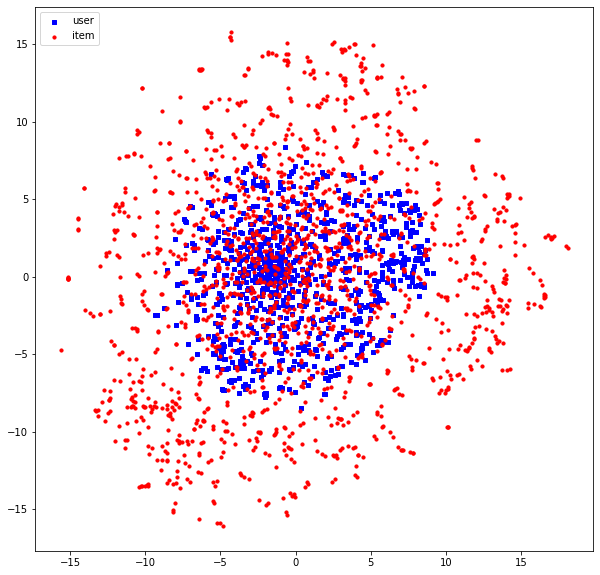

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

ax1.scatter(X[:,0], X[:,1], s=10, c='b', marker="s", label='user')
ax1.scatter(Y[:,0],Y[:,1], s=10, c='r', marker="o", label='item')
plt.legend(loc='upper left');
plt.show()

### m1-100k vis with side feats.

In [ ]:
user_embeddings = model.encoder.conv.mods['5'].weight.data
item_embeddings = model.encoder.conv.mods['rev-5'].weight.data

In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_jobs=-1)
X = tsne.fit_transform(user_embeddings)
Y = tsne.fit_transform(item_embeddings)

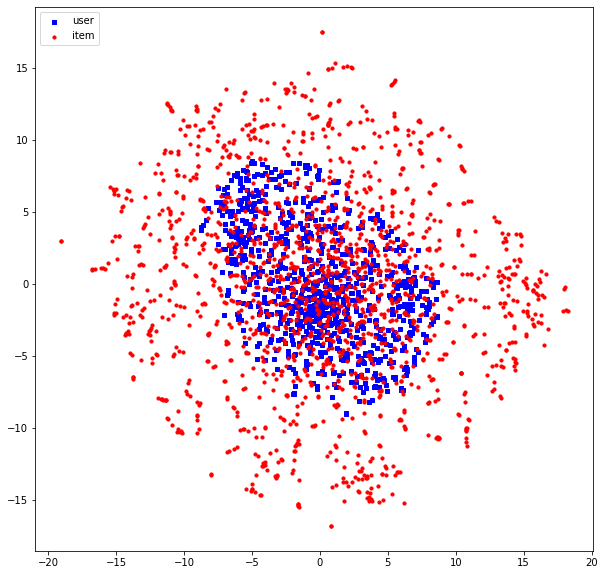

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

ax1.scatter(X[:,0], X[:,1], s=10, c='b', marker="s", label='user')
ax1.scatter(Y[:,0],Y[:,1], s=10, c='r', marker="o", label='item')
plt.legend(loc='upper left');
plt.show()

### imdb vis with side feats.

In [ ]:
user_embeddings = model.encoder.conv.mods['10'].weight.data
item_embeddings = model.encoder.conv.mods['rev-10'].weight.data

In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_jobs=-1)
X = tsne.fit_transform(user_embeddings[:10000])
Y = tsne.fit_transform(item_embeddings[:10000])

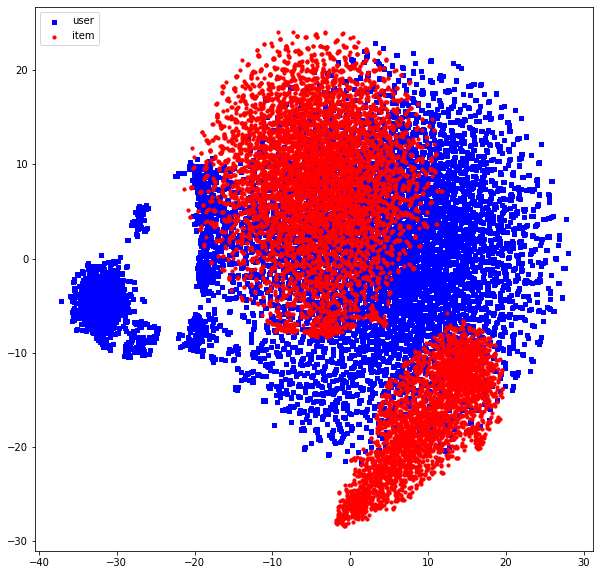

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

ax1.scatter(X[:,0], X[:,1], s=10, c='b', marker="s", label='user')
ax1.scatter(Y[:,0],Y[:,1], s=10, c='r', marker="o", label='item')
plt.legend(loc='upper left');
plt.show()

### imdb vis no side feats.

In [ ]:
user_embeddings = model.encoder.conv.mods['10'].weight.data
item_embeddings = model.encoder.conv.mods['rev-10'].weight.data

In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_jobs=-1)
X = tsne.fit_transform(user_embeddings[:10000])
Y = tsne.fit_transform(item_embeddings[:10000])

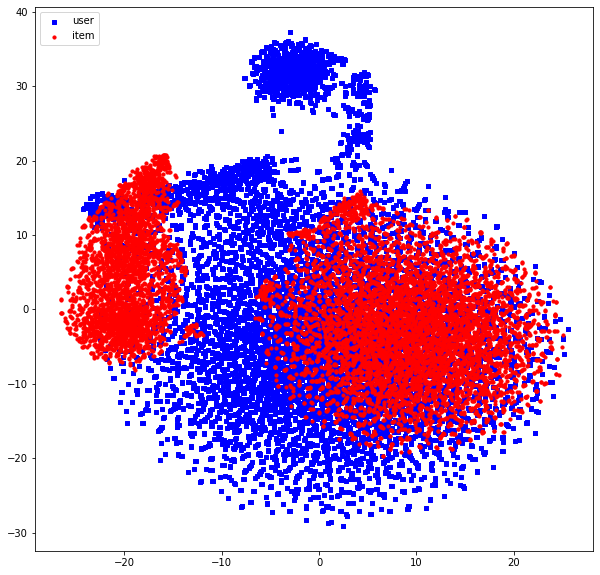

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

ax1.scatter(X[:,0], X[:,1], s=10, c='b', marker="s", label='user')
ax1.scatter(Y[:,0],Y[:,1], s=10, c='r', marker="o", label='item')
plt.legend(loc='upper left');
plt.show()

In [ ]:
# model.eval()

In [ ]:
X

NameError: ignored

In [ ]:
#@title GCMC data.py

"""MovieLens dataset"""
import numpy as np
import os
import re
import pandas as pd
import scipy.sparse as sp
import torch as th

import dgl
from dgl.data.utils import download, extract_archive, get_download_dir
from utils import to_etype_name

_urls = {
    'ml-100k' : 'http://files.grouplens.org/datasets/movielens/ml-100k.zip',
    'ml-1m' : 'http://files.grouplens.org/datasets/movielens/ml-1m.zip',
    'ml-10m' : 'http://files.grouplens.org/datasets/movielens/ml-10m.zip',
}

use_one_hot_fea = True
READ_DATASET_PATH = get_download_dir()

GENRES_ML_100K =\
    ['unknown', 'Action', 'Adventure', 'Animation',
     'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
     'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
     'Thriller', 'War', 'Western']
GENRES_ML_1M = GENRES_ML_100K[1:]
GENRES_ML_10M = GENRES_ML_100K + ['IMAX']
GENRES_IMDB = ['Action','Adult','Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy','Film-Noir','Game-Show','History','Horror','Music','Musical','Mystery','News','Reality-TV','Romance','Sci-Fi','Short','Sport','Talk-Show','Thriller','War','Western']
class MovieLens(object):
    """MovieLens dataset used by GCMC model

    TODO(minjie): make this dataset more general

    The dataset stores MovieLens ratings in two types of graphs. The encoder graph
    contains rating value information in the form of edge types. The decoder graph
    stores plain user-movie pairs in the form of a bipartite graph with no rating
    information. All graphs have two types of nodes: "user" and "movie".

    The training, validation and test set can be summarized as follows:

    training_enc_graph : training user-movie pairs + rating info
    training_dec_graph : training user-movie pairs
    valid_enc_graph : training user-movie pairs + rating info
    valid_dec_graph : validation user-movie pairs
    test_enc_graph : training user-movie pairs + validation user-movie pairs + rating info
    test_dec_graph : test user-movie pairs

    Attributes
    ----------
    train_enc_graph : dgl.DGLHeteroGraph
        Encoder graph for training.
    train_dec_graph : dgl.DGLHeteroGraph
        Decoder graph for training.
    train_labels : torch.Tensor
        The categorical label of each user-movie pair
    train_truths : torch.Tensor
        The actual rating values of each user-movie pair
    valid_enc_graph : dgl.DGLHeteroGraph
        Encoder graph for validation.
    valid_dec_graph : dgl.DGLHeteroGraph
        Decoder graph for validation.
    valid_labels : torch.Tensor
        The categorical label of each user-movie pair
    valid_truths : torch.Tensor
        The actual rating values of each user-movie pair
    test_enc_graph : dgl.DGLHeteroGraph
        Encoder graph for test.
    test_dec_graph : dgl.DGLHeteroGraph
        Decoder graph for test.
    test_labels : torch.Tensor
        The categorical label of each user-movie pair
    test_truths : torch.Tensor
        The actual rating values of each user-movie pair
    user_feature : torch.Tensor
        User feature tensor. If None, representing an identity matrix.
    movie_feature : torch.Tensor
        Movie feature tensor. If None, representing an identity matrix.
    possible_rating_values : np.ndarray
        Available rating values in the dataset

    Parameters
    ----------
    name : str
        Dataset name. Could be "ml-100k", "ml-1m", "ml-10m"
    device : torch.device
        Device context
    mix_cpu_gpu : boo, optional
        If true, the ``user_feature`` attribute is stored in CPU
    use_one_hot_fea : bool, optional
        If true, the ``user_feature`` attribute is None, representing an one-hot identity
        matrix. (Default: False)
    symm : bool, optional
        If true, the use symmetric normalize constant. Otherwise, use left normalize
        constant. (Default: True)
    test_ratio : float, optional
        Ratio of test data
    valid_ratio : float, optional
        Ratio of validation data

    """
    def __init__(self, name, device, mix_cpu_gpu=False,
                 use_one_hot_fea=False, symm=True,
                 test_ratio=0.1, valid_ratio=0.1):
        self._name = name
        self._device = device
        self._symm = symm
        self._test_ratio = test_ratio
        self._valid_ratio = valid_ratio
        # download and extract
        # download_dir = get_download_dir()
        # zip_file_path = '{}/{}.zip'.format(download_dir, name)
        # download(_urls[name], path=zip_file_path)
        # extract_archive(zip_file_path, '{}/{}'.format(download_dir, name))
        # if name == 'ml-10m':
        #     root_folder = 'ml-10M100K'
        # else:
        #     root_folder = name
        # self._dir = os.path.join(download_dir, name, root_folder)
        print("Starting processing {} ...".format(self._name))
        self._load_raw_user_info()
        self._load_raw_movie_info()
        print('......')
        if self._name == 'ml-100k' or self._name == 'imdb':
            self.all_train_rating_info = decompress_pickle('train_df_imdb') # self._load_raw_rates(os.path.join(self._dir, 'u1.base'), '\t')
            self.test_rating_info = decompress_pickle('test_df_imdb') # self._load_raw_rates(os.path.join(self._dir, 'u1.test'), '\t')
            # self.all_rating_info = pd.concat([self.all_train_rating_info, self.test_rating_info])
            self.all_rating_info = decompress_pickle('df_reviews_f_imdb')
        elif self._name == 'ml-1m' or self._name == 'ml-10m':
            self.all_rating_info = self._load_raw_rates(os.path.join(self._dir, 'ratings.dat'), '::')
            num_test = int(np.ceil(self.all_rating_info.shape[0] * self._test_ratio))
            shuffled_idx = np.random.permutation(self.all_rating_info.shape[0])
            self.test_rating_info = self.all_rating_info.iloc[shuffled_idx[: num_test]]
            self.all_train_rating_info = self.all_rating_info.iloc[shuffled_idx[num_test: ]]
        else:
            raise NotImplementedError
        print('......')
        num_valid = int(np.ceil(self.all_train_rating_info.shape[0] * self._valid_ratio))
        shuffled_idx = np.random.permutation(self.all_train_rating_info.shape[0])
        self.valid_rating_info = self.all_train_rating_info.iloc[shuffled_idx[: num_valid]]
        self.train_rating_info = self.all_train_rating_info.iloc[shuffled_idx[num_valid: ]]
        self.possible_rating_values = np.unique(self.train_rating_info["rating"].values)

        print("All rating pairs : {}".format(self.all_rating_info.shape[0]))
        print("\tAll train rating pairs : {}".format(self.all_train_rating_info.shape[0]))
        print("\t\tTrain rating pairs : {}".format(self.train_rating_info.shape[0]))
        print("\t\tValid rating pairs : {}".format(self.valid_rating_info.shape[0]))
        print("\tTest rating pairs  : {}".format(self.test_rating_info.shape[0]))

        self.user_info = self._drop_unseen_nodes(orign_info=self.user_info,
                                                 cmp_col_name="user_id",
                                                 reserved_ids_set=set(self.all_rating_info["user_id"].values),
                                                 label="user")
        self.movie_info = self._drop_unseen_nodes(orign_info=self.movie_info,
                                                  cmp_col_name="movie_id",
                                                  reserved_ids_set=set(self.all_rating_info["movie_id"].values),
                                                  label="movie")

        # Map user/movie to the global id
        self.global_user_id_map = {ele: i for i, ele in enumerate(self.user_info['user_id'])}
        self.global_movie_id_map = {ele: i for i, ele in enumerate(self.movie_info['movie_id'])}
        print('Total user number = {}, movie number = {}'.format(len(self.global_user_id_map),
                                                                 len(self.global_movie_id_map)))
        self._num_user = len(self.global_user_id_map)
        self._num_movie = len(self.global_movie_id_map)

        ### Generate features
        use_one_hot_fea = True
        if use_one_hot_fea:
            self.user_feature = None
            self.movie_feature = None
            print("hello")
        else:
            print("helloELSE")
            # if mix_cpu_gpu, we put features in CPU
            if mix_cpu_gpu:
                self.user_feature = th.FloatTensor(self._process_user_fea())
                self.movie_feature = th.FloatTensor(self._process_movie_fea())
            else:
                self.user_feature = th.FloatTensor(self._process_user_fea()).to(self._device)
                self.movie_feature = th.FloatTensor(self._process_movie_fea()).to(self._device)
        if self.user_feature is None:
            self.user_feature_shape = (self.num_user, self.num_user)
            self.movie_feature_shape = (self.num_movie, self.num_movie)
        else:
            self.user_feature_shape = self.user_feature.shape
            self.movie_feature_shape = self.movie_feature.shape
        info_line = "Feature dim: "
        info_line += "\nuser: {}".format(self.user_feature_shape)
        info_line += "\nmovie: {}".format(self.movie_feature_shape)
        print(info_line)

        all_train_rating_pairs, all_train_rating_values = self._generate_pair_value(self.all_train_rating_info)
        train_rating_pairs, train_rating_values = self._generate_pair_value(self.train_rating_info)
        valid_rating_pairs, valid_rating_values = self._generate_pair_value(self.valid_rating_info)
        test_rating_pairs, test_rating_values = self._generate_pair_value(self.test_rating_info)

        def _make_labels(ratings):
            labels = th.LongTensor(np.searchsorted(self.possible_rating_values, ratings)).to(device)
            return labels

        self.train_enc_graph = self._generate_enc_graph(train_rating_pairs, train_rating_values, add_support=True)
        self.train_dec_graph = self._generate_dec_graph(train_rating_pairs)
        self.train_labels = _make_labels(train_rating_values)
        self.train_truths = th.FloatTensor(train_rating_values).to(device)

        self.valid_enc_graph = self.train_enc_graph
        self.valid_dec_graph = self._generate_dec_graph(valid_rating_pairs)
        self.valid_labels = _make_labels(valid_rating_values)
        self.valid_truths = th.FloatTensor(valid_rating_values).to(device)

        self.test_enc_graph = self._generate_enc_graph(all_train_rating_pairs, all_train_rating_values, add_support=True)
        self.test_dec_graph = self._generate_dec_graph(test_rating_pairs)
        self.test_labels = _make_labels(test_rating_values)
        self.test_truths = th.FloatTensor(test_rating_values).to(device)

        def _npairs(graph):
            rst = 0
            for r in self.possible_rating_values:
                r = to_etype_name(r)
                rst += graph.number_of_edges(str(r))
            return rst

        print("Train enc graph: \t#user:{}\t#movie:{}\t#pairs:{}".format(
            self.train_enc_graph.number_of_nodes('user'), self.train_enc_graph.number_of_nodes('movie'),
            _npairs(self.train_enc_graph)))
        print("Train dec graph: \t#user:{}\t#movie:{}\t#pairs:{}".format(
            self.train_dec_graph.number_of_nodes('user'), self.train_dec_graph.number_of_nodes('movie'),
            self.train_dec_graph.number_of_edges()))
        print("Valid enc graph: \t#user:{}\t#movie:{}\t#pairs:{}".format(
            self.valid_enc_graph.number_of_nodes('user'), self.valid_enc_graph.number_of_nodes('movie'),
            _npairs(self.valid_enc_graph)))
        print("Valid dec graph: \t#user:{}\t#movie:{}\t#pairs:{}".format(
            self.valid_dec_graph.number_of_nodes('user'), self.valid_dec_graph.number_of_nodes('movie'),
            self.valid_dec_graph.number_of_edges()))
        print("Test enc graph: \t#user:{}\t#movie:{}\t#pairs:{}".format(
            self.test_enc_graph.number_of_nodes('user'), self.test_enc_graph.number_of_nodes('movie'),
            _npairs(self.test_enc_graph)))
        print("Test dec graph: \t#user:{}\t#movie:{}\t#pairs:{}".format(
            self.test_dec_graph.number_of_nodes('user'), self.test_dec_graph.number_of_nodes('movie'),
            self.test_dec_graph.number_of_edges()))

    def _generate_pair_value(self, rating_info):
        rating_pairs = (np.array([self.global_user_id_map[ele] for ele in rating_info["user_id"]],
                                 dtype=np.int64),
                        np.array([self.global_movie_id_map[ele] for ele in rating_info["movie_id"]],
                                 dtype=np.int64))
        rating_values = rating_info["rating"].values.astype(np.float32)

        return rating_pairs, rating_values

    def _generate_enc_graph(self, rating_pairs, rating_values, add_support=False):
        user_movie_R = np.zeros((self._num_user, self._num_movie), dtype=np.float32)
        user_movie_R[rating_pairs] = rating_values

        data_dict = dict()
        num_nodes_dict = {'user': self._num_user, 'movie': self._num_movie}
        rating_row, rating_col = rating_pairs
        for rating in self.possible_rating_values:
            ridx = np.where(rating_values == rating)
            rrow = rating_row[ridx]
            rcol = rating_col[ridx]
            rating = to_etype_name(rating)
            data_dict.update({
                ('user', str(rating), 'movie'): (rrow, rcol),
                ('movie', 'rev-%s' % str(rating), 'user'): (rcol, rrow)
            })
        graph = dgl.heterograph(data_dict, num_nodes_dict=num_nodes_dict)

        # sanity check
        print(sum([graph.number_of_edges(et) for et in graph.etypes]))
        assert len(rating_pairs[0]) == sum([graph.number_of_edges(et) for et in graph.etypes]) // 2

        if add_support:
            def _calc_norm(x):
                x = x.numpy().astype('float32')
                x[x == 0.] = np.inf
                x = th.FloatTensor(1. / np.sqrt(x))
                return x.unsqueeze(1)
            user_ci = []
            user_cj = []
            movie_ci = []
            movie_cj = []
            for r in self.possible_rating_values:
                r = to_etype_name(r)
                user_ci.append(graph['rev-%s' % r].in_degrees())
                movie_ci.append(graph[r].in_degrees())
                if self._symm:
                    user_cj.append(graph[r].out_degrees())
                    movie_cj.append(graph['rev-%s' % r].out_degrees())
                else:
                    user_cj.append(th.zeros((self.num_user,)))
                    movie_cj.append(th.zeros((self.num_movie,)))
            user_ci = _calc_norm(sum(user_ci))
            movie_ci = _calc_norm(sum(movie_ci))
            if self._symm:
                user_cj = _calc_norm(sum(user_cj))
                movie_cj = _calc_norm(sum(movie_cj))
            else:
                user_cj = th.ones(self.num_user,)
                movie_cj = th.ones(self.num_movie,)
            graph.nodes['user'].data.update({'ci' : user_ci, 'cj' : user_cj})
            graph.nodes['movie'].data.update({'ci' : movie_ci, 'cj' : movie_cj})

        return graph

    def _generate_dec_graph(self, rating_pairs):
        ones = np.ones_like(rating_pairs[0])
        user_movie_ratings_coo = sp.coo_matrix(
            (ones, rating_pairs),
            shape=(self.num_user, self.num_movie), dtype=np.float32)
        g = dgl.bipartite_from_scipy(user_movie_ratings_coo, utype='_U', etype='_E', vtype='_V')
        return dgl.heterograph({('user', 'rate', 'movie'): g.edges()},
                               num_nodes_dict={'user': self.num_user, 'movie': self.num_movie})

    @property
    def num_links(self):
        return self.possible_rating_values.size

    @property
    def num_user(self):
        return self._num_user

    @property
    def num_movie(self):
        return self._num_movie

    def _drop_unseen_nodes(self, orign_info, cmp_col_name, reserved_ids_set, label):
        # print("  -----------------")
        # print("{}: {}(reserved) v.s. {}(from info)".format(label, len(reserved_ids_set),
        #                                                      len(set(orign_info[cmp_col_name].values))))
        if reserved_ids_set != set(orign_info[cmp_col_name].values):
            pd_rating_ids = pd.DataFrame(list(reserved_ids_set), columns=["id_graph"])
            # print("\torign_info: ({}, {})".format(orign_info.shape[0], orign_info.shape[1]))
            data_info = orign_info.merge(pd_rating_ids, left_on=cmp_col_name, right_on='id_graph', how='outer')
            data_info = data_info.dropna(subset=[cmp_col_name, 'id_graph'])
            data_info = data_info.drop(columns=["id_graph"])
            data_info = data_info.reset_index(drop=True)
            # print("\tAfter dropping, data shape: ({}, {})".format(data_info.shape[0], data_info.shape[1]))
            return data_info
        else:
            orign_info = orign_info.reset_index(drop=True)
            return orign_info

    def _load_raw_rates(self, file_path, sep):
        """In MovieLens, the rates have the following format

        ml-100k
        user id \t movie id \t rating \t timestamp

        ml-1m/10m
        UserID::MovieID::Rating::Timestamp

        timestamp is unix timestamp and can be converted by pd.to_datetime(X, unit='s')

        Parameters
        ----------
        file_path : str

        Returns
        -------
        rating_info : pd.DataFrame
        """
        rating_info = pd.read_csv(
            file_path, sep=sep, header=None,
            names=['user_id', 'movie_id', 'rating', 'timestamp'],
            dtype={'user_id': np.int32, 'movie_id' : np.int32,
                   'ratings': np.float32, 'timestamp': np.int64}, engine='python')
        return rating_info

    def _load_raw_user_info(self):
        """In MovieLens, the user attributes file have the following formats:

        ml-100k:
        user id | age | gender | occupation | zip code

        ml-1m:
        UserID::Gender::Age::Occupation::Zip-code

        For ml-10m, there is no user information. We read the user id from the rating file.

        Parameters
        ----------
        name : str

        Returns
        -------
        user_info : pd.DataFrame
        """
        if self._name == 'imdb':
          self.user_info = decompress_pickle('user_df_imdb')

        elif self._name == 'ml-100k':
            self.user_info = pd.read_csv(os.path.join(self._dir, 'u.user'), sep='|', header=None,
                                    names=['id', 'age', 'gender', 'occupation', 'zip_code'], engine='python')


        # elif self._name == 'imdb':
        #     self.user_info = pd.read_csv(sep='|', header=None,
        #                             names=['id', 'age', 'gender', 'occupation', 'zip_code'], engine='python')
        # elif self._name == 'ml-1m':
        #     self.user_info = pd.read_csv(os.path.join(self._dir, 'users.dat'), sep='::', header=None,
        #                             names=['id', 'gender', 'age', 'occupation', 'zip_code'], engine='python')
        # elif self._name == 'ml-10m':
        #     rating_info = pd.read_csv(
        #         os.path.join(self._dir, 'ratings.dat'), sep='::', header=None,
        #         names=['user_id', 'movie_id', 'rating', 'timestamp'],
        #         dtype={'user_id': np.int32, 'movie_id': np.int32, 'ratings': np.float32,
        #                'timestamp': np.int64}, engine='python')
        #     self.user_info = pd.DataFrame(np.unique(rating_info['user_id'].values.astype(np.int32)),
        #                              columns=['id'])
        else:
            raise NotImplementedError

    def _process_user_fea(self):
        """

        Parameters
        ----------
        user_info : pd.DataFrame
        name : str
        For ml-100k and ml-1m, the column name is ['id', 'gender', 'age', 'occupation', 'zip_code'].
            We take the age, gender, and the one-hot encoding of the occupation as the user features.
        For ml-10m, there is no user feature and we set the feature to be a single zero.

        Returns
        -------
        user_features : np.ndarray

        """

        if self._name == 'ml-100k'  or self._name == 'ml-1m':
            ages = self.user_info['age'].values.astype(np.float32)
            gender = (self.user_info['gender'] == 'F').values.astype(np.float32)
            all_occupations = set(self.user_info['occupation'])
            occupation_map = {ele: i for i, ele in enumerate(all_occupations)}
            occupation_one_hot = np.zeros(shape=(self.user_info.shape[0], len(all_occupations)),
                                          dtype=np.float32)
            occupation_one_hot[np.arange(self.user_info.shape[0]),
                               np.array([occupation_map[ele] for ele in self.user_info['occupation']])] = 1
            user_features = np.concatenate([ages.reshape((self.user_info.shape[0], 1)) / 50.0,
                                            gender.reshape((self.user_info.shape[0], 1)),
                                            occupation_one_hot], axis=1)
        elif self._name == 'ml-10m':
            user_features = np.zeros(shape=(self.user_info.shape[0], 1), dtype=np.float32)
        else:
            raise NotImplementedError
        return user_features

    def _load_raw_movie_info(self):
        """In MovieLens, the movie attributes may have the following formats:

        In ml_100k:

        movie id | movie title | release date | video release date | IMDb URL | [genres]

        In ml_1m, ml_10m:

        MovieID::Title (Release Year)::Genres

        Also, Genres are separated by |, e.g., Adventure|Animation|Children|Comedy|Fantasy

        Parameters
        ----------
        name : str

        Returns
        -------
        movie_info : pd.DataFrame
            For ml-100k, the column name is ['id', 'title', 'release_date', 'video_release_date', 'url'] + [GENRES (19)]]
            For ml-1m and ml-10m, the column name is ['id', 'title'] + [GENRES (18/20)]]
        """
        if self._name == 'ml-100k':
            GENRES = GENRES_ML_100K
        elif self._name == 'ml-1m':
            GENRES = GENRES_ML_1M
        elif self._name == 'ml-10m':
            GENRES = GENRES_ML_10M
        elif self._name == 'imdb':
            GENRES = GENRES_IMDB
        else:
            raise NotImplementedError

        if self._name == 'imdb':
          self.movie_info = decompress_pickle('item_df_imdb')

        elif self._name == 'ml-100k':
            file_path = os.path.join(self._dir, 'u.item')
            self.movie_info = pd.read_csv(file_path, sep='|', header=None,
                                          names=['id', 'title', 'release_date', 'video_release_date', 'url'] + GENRES,
                                          encoding='iso-8859-1')
        # elif self._name == 'ml-1m' or self._name == 'ml-10m':
        #     file_path = os.path.join(self._dir, 'movies.dat')
        #     movie_info = pd.read_csv(file_path, sep='::', header=None,
        #                              names=['id', 'title', 'genres'], encoding='iso-8859-1')
        #     genre_map = {ele: i for i, ele in enumerate(GENRES)}
        #     genre_map['Children\'s'] = genre_map['Children']
        #     genre_map['Childrens'] = genre_map['Children']
        #     movie_genres = np.zeros(shape=(movie_info.shape[0], len(GENRES)), dtype=np.float32)
        #     for i, genres in enumerate(movie_info['genres']):
        #         for ele in genres.split('|'):
        #             if ele in genre_map:
        #                 movie_genres[i, genre_map[ele]] = 1.0
        #             else:
        #                 print('genres not found, filled with unknown: {}'.format(genres))
        #                 movie_genres[i, genre_map['unknown']] = 1.0
        #     for idx, genre_name in enumerate(GENRES):
        #         assert idx == genre_map[genre_name]
        #         movie_info[genre_name] = movie_genres[:, idx]
        #     self.movie_info = movie_info.drop(columns=["genres"])
        else:
            raise NotImplementedError

    def _process_movie_fea(self):
        """

        Parameters
        ----------
        movie_info : pd.DataFrame
        name :  str

        Returns
        -------
        movie_features : np.ndarray
            Generate movie features by concatenating embedding and the year

        """
        import torchtext

        if self._name == 'ml-100k':
            GENRES = GENRES_ML_100K
        elif self._name == 'ml-1m':
            GENRES = GENRES_ML_1M
        elif self._name == 'ml-10m':
            GENRES = GENRES_ML_10M
        elif self._name == 'imdb':
            GENRES = GENRES_IMDB
        else:
            raise NotImplementedError

        TEXT = torchtext.legacy.data.Field(tokenize='spacy', tokenizer_language='en_core_web_sm')
        embedding = torchtext.vocab.GloVe(name='840B', dim=300)

        title_embedding = np.zeros(shape=(self.movie_info.shape[0], 300), dtype=np.float32)
        release_years = np.zeros(shape=(self.movie_info.shape[0], 1), dtype=np.float32)
        p = re.compile(r'(.+)\s*\((\d+)\)')
        for i, title in enumerate(self.movie_info['title']):
            match_res = p.match(title)
            if match_res is None:
                print('{} cannot be matched, index={}, name={}'.format(title, i, self._name))
                title_context, year = title, 1950
            else:
                title_context, year = match_res.groups()
            # We use average of glove
            title_embedding[i, :] = embedding.get_vecs_by_tokens(TEXT.tokenize(title_context)).numpy().mean(axis=0)
            release_years[i] = float(year)
        movie_features = np.concatenate((title_embedding,
                                         (release_years - 1950.0) / 100.0,
                                         self.movie_info[GENRES]),
                                        axis=1)
        return movie_features

if __name__ == '__main__':
    model = MovieLens("imdb", device=th.device('cpu'), symm=True)


Starting processing imdb ...
......
......
All rating pairs : 100000
	All train rating pairs : 75000
		Train rating pairs : 67500
		Valid rating pairs : 7500
	Test rating pairs  : 25000
Total user number = 72632, movie number = 39599
hello
Feature dim: 
user: (72632, 72632)
movie: (39599, 39599)
135000
150000
Train enc graph: 	#user:72632	#movie:39599	#pairs:67500
Train dec graph: 	#user:72632	#movie:39599	#pairs:67500
Valid enc graph: 	#user:72632	#movie:39599	#pairs:67500
Valid dec graph: 	#user:72632	#movie:39599	#pairs:7500
Test enc graph: 	#user:72632	#movie:39599	#pairs:75000
Test dec graph: 	#user:72632	#movie:39599	#pairs:25000


In [ ]:
# encoded_genre,genre = pd.factorize(df_movies['Genre'])

In [ ]:
#@title Original data.py
"""MovieLens dataset"""
import numpy as np
import os
import re
import pandas as pd
import scipy.sparse as sp
import torch as th

import dgl
from dgl.data.utils import download, extract_archive, get_download_dir
from utils import to_etype_name

_urls = {
    'ml-100k' : 'http://files.grouplens.org/datasets/movielens/ml-100k.zip',
    'ml-1m' : 'http://files.grouplens.org/datasets/movielens/ml-1m.zip',
    'ml-10m' : 'http://files.grouplens.org/datasets/movielens/ml-10m.zip',
}

READ_DATASET_PATH = get_download_dir()
GENRES_ML_100K =\
    ['unknown', 'Action', 'Adventure', 'Animation',
     'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
     'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
     'Thriller', 'War', 'Western']
GENRES_ML_1M = GENRES_ML_100K[1:]
GENRES_ML_10M = GENRES_ML_100K + ['IMAX']

class MovieLens(object):
    """MovieLens dataset used by GCMC model

    TODO(minjie): make this dataset more general

    The dataset stores MovieLens ratings in two types of graphs. The encoder graph
    contains rating value information in the form of edge types. The decoder graph
    stores plain user-movie pairs in the form of a bipartite graph with no rating
    information. All graphs have two types of nodes: "user" and "movie".

    The training, validation and test set can be summarized as follows:

    training_enc_graph : training user-movie pairs + rating info
    training_dec_graph : training user-movie pairs
    valid_enc_graph : training user-movie pairs + rating info
    valid_dec_graph : validation user-movie pairs
    test_enc_graph : training user-movie pairs + validation user-movie pairs + rating info
    test_dec_graph : test user-movie pairs

    Attributes
    ----------
    train_enc_graph : dgl.DGLHeteroGraph
        Encoder graph for training.
    train_dec_graph : dgl.DGLHeteroGraph
        Decoder graph for training.
    train_labels : torch.Tensor
        The categorical label of each user-movie pair
    train_truths : torch.Tensor
        The actual rating values of each user-movie pair
    valid_enc_graph : dgl.DGLHeteroGraph
        Encoder graph for validation.
    valid_dec_graph : dgl.DGLHeteroGraph
        Decoder graph for validation.
    valid_labels : torch.Tensor
        The categorical label of each user-movie pair
    valid_truths : torch.Tensor
        The actual rating values of each user-movie pair
    test_enc_graph : dgl.DGLHeteroGraph
        Encoder graph for test.
    test_dec_graph : dgl.DGLHeteroGraph
        Decoder graph for test.
    test_labels : torch.Tensor
        The categorical label of each user-movie pair
    test_truths : torch.Tensor
        The actual rating values of each user-movie pair
    user_feature : torch.Tensor
        User feature tensor. If None, representing an identity matrix.
    movie_feature : torch.Tensor
        Movie feature tensor. If None, representing an identity matrix.
    possible_rating_values : np.ndarray
        Available rating values in the dataset

    Parameters
    ----------
    name : str
        Dataset name. Could be "ml-100k", "ml-1m", "ml-10m"
    device : torch.device
        Device context
    mix_cpu_gpu : boo, optional
        If true, the ``user_feature`` attribute is stored in CPU
    use_one_hot_fea : bool, optional
        If true, the ``user_feature`` attribute is None, representing an one-hot identity
        matrix. (Default: False)
    symm : bool, optional
        If true, the use symmetric normalize constant. Otherwise, use left normalize
        constant. (Default: True)
    test_ratio : float, optional
        Ratio of test data
    valid_ratio : float, optional
        Ratio of validation data

    """
    def __init__(self, name, device, mix_cpu_gpu=False,
                 use_one_hot_fea=False, symm=True,
                 test_ratio=0.1, valid_ratio=0.1):
        self._name = name
        self._device = device
        self._symm = symm
        self._test_ratio = test_ratio
        self._valid_ratio = valid_ratio
        # download and extract
        download_dir = get_download_dir()
        zip_file_path = '{}/{}.zip'.format(download_dir, name)
        download(_urls[name], path=zip_file_path)
        extract_archive(zip_file_path, '{}/{}'.format(download_dir, name))
        if name == 'ml-10m':
            root_folder = 'ml-10M100K'
        else:
            root_folder = name
        self._dir = os.path.join(download_dir, name, root_folder)
        print("Starting processing {} ...".format(self._name))
        self._load_raw_user_info()
        self._load_raw_movie_info()
        print('......')
        if self._name == 'ml-100k':
            self.all_train_rating_info = self._load_raw_rates(os.path.join(self._dir, 'u1.base'), '\t')
            self.test_rating_info = self._load_raw_rates(os.path.join(self._dir, 'u1.test'), '\t')
            self.all_rating_info = pd.concat([self.all_train_rating_info, self.test_rating_info])
        elif self._name == 'ml-1m' or self._name == 'ml-10m':
            self.all_rating_info = self._load_raw_rates(os.path.join(self._dir, 'ratings.dat'), '::')
            num_test = int(np.ceil(self.all_rating_info.shape[0] * self._test_ratio))
            shuffled_idx = np.random.permutation(self.all_rating_info.shape[0])
            self.test_rating_info = self.all_rating_info.iloc[shuffled_idx[: num_test]]
            self.all_train_rating_info = self.all_rating_info.iloc[shuffled_idx[num_test: ]]
        else:
            raise NotImplementedError
        print('......')
        num_valid = int(np.ceil(self.all_train_rating_info.shape[0] * self._valid_ratio))
        shuffled_idx = np.random.permutation(self.all_train_rating_info.shape[0])
        self.valid_rating_info = self.all_train_rating_info.iloc[shuffled_idx[: num_valid]]
        self.train_rating_info = self.all_train_rating_info.iloc[shuffled_idx[num_valid: ]]
        self.possible_rating_values = np.unique(self.train_rating_info["rating"].values)

        print("All rating pairs : {}".format(self.all_rating_info.shape[0]))
        print("\tAll train rating pairs : {}".format(self.all_train_rating_info.shape[0]))
        print("\t\tTrain rating pairs : {}".format(self.train_rating_info.shape[0]))
        print("\t\tValid rating pairs : {}".format(self.valid_rating_info.shape[0]))
        print("\tTest rating pairs  : {}".format(self.test_rating_info.shape[0]))

        self.user_info = self._drop_unseen_nodes(orign_info=self.user_info,
                                                 cmp_col_name="id",
                                                 reserved_ids_set=set(self.all_rating_info["user_id"].values),
                                                 label="user")
        self.movie_info = self._drop_unseen_nodes(orign_info=self.movie_info,
                                                  cmp_col_name="id",
                                                  reserved_ids_set=set(self.all_rating_info["movie_id"].values),
                                                  label="movie")

        # Map user/movie to the global id
        self.global_user_id_map = {ele: i for i, ele in enumerate(self.user_info['id'])}
        self.global_movie_id_map = {ele: i for i, ele in enumerate(self.movie_info['id'])}
        print('Total user number = {}, movie number = {}'.format(len(self.global_user_id_map),
                                                                 len(self.global_movie_id_map)))
        self._num_user = len(self.global_user_id_map)
        self._num_movie = len(self.global_movie_id_map)

        ### Generate features
        use_one_hot_fea = True
        if use_one_hot_fea:
            self.user_feature = None
            self.movie_feature = None
        else:
            # if mix_cpu_gpu, we put features in CPU
            if mix_cpu_gpu:
                self.user_feature = th.FloatTensor(self._process_user_fea())
                self.movie_feature = th.FloatTensor(self._process_movie_fea())
            else:
                self.user_feature = th.FloatTensor(self._process_user_fea()).to(self._device)
                self.movie_feature = th.FloatTensor(self._process_movie_fea()).to(self._device)
        if self.user_feature is None:
            self.user_feature_shape = (self.num_user, self.num_user)
            self.movie_feature_shape = (self.num_movie, self.num_movie)
        else:
            self.user_feature_shape = self.user_feature.shape
            self.movie_feature_shape = self.movie_feature.shape
        info_line = "Feature dim: "
        info_line += "\nuser: {}".format(self.user_feature_shape)
        info_line += "\nmovie: {}".format(self.movie_feature_shape)
        print(info_line)

        all_train_rating_pairs, all_train_rating_values = self._generate_pair_value(self.all_train_rating_info)
        train_rating_pairs, train_rating_values = self._generate_pair_value(self.train_rating_info)
        valid_rating_pairs, valid_rating_values = self._generate_pair_value(self.valid_rating_info)
        test_rating_pairs, test_rating_values = self._generate_pair_value(self.test_rating_info)

        def _make_labels(ratings):
            labels = th.LongTensor(np.searchsorted(self.possible_rating_values, ratings)).to(device)
            return labels

        self.train_enc_graph = self._generate_enc_graph(train_rating_pairs, train_rating_values, add_support=True)
        self.train_dec_graph = self._generate_dec_graph(train_rating_pairs)
        self.train_labels = _make_labels(train_rating_values)
        self.train_truths = th.FloatTensor(train_rating_values).to(device)

        self.valid_enc_graph = self.train_enc_graph
        self.valid_dec_graph = self._generate_dec_graph(valid_rating_pairs)
        self.valid_labels = _make_labels(valid_rating_values)
        self.valid_truths = th.FloatTensor(valid_rating_values).to(device)

        self.test_enc_graph = self._generate_enc_graph(all_train_rating_pairs, all_train_rating_values, add_support=True)
        self.test_dec_graph = self._generate_dec_graph(test_rating_pairs)
        self.test_labels = _make_labels(test_rating_values)
        self.test_truths = th.FloatTensor(test_rating_values).to(device)

        def _npairs(graph):
            rst = 0
            for r in self.possible_rating_values:
                r = to_etype_name(r)
                rst += graph.number_of_edges(str(r))
            return rst

        print("Train enc graph: \t#user:{}\t#movie:{}\t#pairs:{}".format(
            self.train_enc_graph.number_of_nodes('user'), self.train_enc_graph.number_of_nodes('movie'),
            _npairs(self.train_enc_graph)))
        print("Train dec graph: \t#user:{}\t#movie:{}\t#pairs:{}".format(
            self.train_dec_graph.number_of_nodes('user'), self.train_dec_graph.number_of_nodes('movie'),
            self.train_dec_graph.number_of_edges()))
        print("Valid enc graph: \t#user:{}\t#movie:{}\t#pairs:{}".format(
            self.valid_enc_graph.number_of_nodes('user'), self.valid_enc_graph.number_of_nodes('movie'),
            _npairs(self.valid_enc_graph)))
        print("Valid dec graph: \t#user:{}\t#movie:{}\t#pairs:{}".format(
            self.valid_dec_graph.number_of_nodes('user'), self.valid_dec_graph.number_of_nodes('movie'),
            self.valid_dec_graph.number_of_edges()))
        print("Test enc graph: \t#user:{}\t#movie:{}\t#pairs:{}".format(
            self.test_enc_graph.number_of_nodes('user'), self.test_enc_graph.number_of_nodes('movie'),
            _npairs(self.test_enc_graph)))
        print("Test dec graph: \t#user:{}\t#movie:{}\t#pairs:{}".format(
            self.test_dec_graph.number_of_nodes('user'), self.test_dec_graph.number_of_nodes('movie'),
            self.test_dec_graph.number_of_edges()))

    def _generate_pair_value(self, rating_info):
        rating_pairs = (np.array([self.global_user_id_map[ele] for ele in rating_info["user_id"]],
                                 dtype=np.int64),
                        np.array([self.global_movie_id_map[ele] for ele in rating_info["movie_id"]],
                                 dtype=np.int64))
        rating_values = rating_info["rating"].values.astype(np.float32)
        return rating_pairs, rating_values

    def _generate_enc_graph(self, rating_pairs, rating_values, add_support=False):
        user_movie_R = np.zeros((self._num_user, self._num_movie), dtype=np.float32)
        user_movie_R[rating_pairs] = rating_values
        print(len(rating_values))
        print(max(rating_pairs[0]))
        data_dict = dict()
        num_nodes_dict = {'user': self._num_user, 'movie': self._num_movie}
        rating_row, rating_col = rating_pairs
        for rating in self.possible_rating_values:
            ridx = np.where(rating_values == rating)
            rrow = rating_row[ridx]
            rcol = rating_col[ridx]
            rating = to_etype_name(rating)
            data_dict.update({
                ('user', str(rating), 'movie'): (rrow, rcol),
                ('movie', 'rev-%s' % str(rating), 'user'): (rcol, rrow)
            })
        graph = dgl.heterograph(data_dict, num_nodes_dict=num_nodes_dict)

        # sanity check
        assert len(rating_pairs[0]) == sum([graph.number_of_edges(et) for et in graph.etypes]) // 2

        if add_support:
            def _calc_norm(x):
                x = x.numpy().astype('float32')
                x[x == 0.] = np.inf
                x = th.FloatTensor(1. / np.sqrt(x))
                return x.unsqueeze(1)
            user_ci = []
            user_cj = []
            movie_ci = []
            movie_cj = []
            for r in self.possible_rating_values:
                r = to_etype_name(r)
                user_ci.append(graph['rev-%s' % r].in_degrees())
                movie_ci.append(graph[r].in_degrees())
                if self._symm:
                    user_cj.append(graph[r].out_degrees())
                    movie_cj.append(graph['rev-%s' % r].out_degrees())
                else:
                    user_cj.append(th.zeros((self.num_user,)))
                    movie_cj.append(th.zeros((self.num_movie,)))
            user_ci = _calc_norm(sum(user_ci))
            movie_ci = _calc_norm(sum(movie_ci))
            if self._symm:
                user_cj = _calc_norm(sum(user_cj))
                movie_cj = _calc_norm(sum(movie_cj))
            else:
                user_cj = th.ones(self.num_user,)
                movie_cj = th.ones(self.num_movie,)
            graph.nodes['user'].data.update({'ci' : user_ci, 'cj' : user_cj})
            graph.nodes['movie'].data.update({'ci' : movie_ci, 'cj' : movie_cj})

        return graph

    def _generate_dec_graph(self, rating_pairs):
        ones = np.ones_like(rating_pairs[0])
        user_movie_ratings_coo = sp.coo_matrix(
            (ones, rating_pairs),
            shape=(self.num_user, self.num_movie), dtype=np.float32)
        g = dgl.bipartite_from_scipy(user_movie_ratings_coo, utype='_U', etype='_E', vtype='_V')
        return dgl.heterograph({('user', 'rate', 'movie'): g.edges()},
                               num_nodes_dict={'user': self.num_user, 'movie': self.num_movie})

    @property
    def num_links(self):
        return self.possible_rating_values.size

    @property
    def num_user(self):
        return self._num_user

    @property
    def num_movie(self):
        return self._num_movie

    def _drop_unseen_nodes(self, orign_info, cmp_col_name, reserved_ids_set, label):
        # print("  -----------------")
        # print("{}: {}(reserved) v.s. {}(from info)".format(label, len(reserved_ids_set),
        #                                                      len(set(orign_info[cmp_col_name].values))))
        if reserved_ids_set != set(orign_info[cmp_col_name].values):
            pd_rating_ids = pd.DataFrame(list(reserved_ids_set), columns=["id_graph"])
            # print("\torign_info: ({}, {})".format(orign_info.shape[0], orign_info.shape[1]))
            data_info = orign_info.merge(pd_rating_ids, left_on=cmp_col_name, right_on='id_graph', how='outer')
            data_info = data_info.dropna(subset=[cmp_col_name, 'id_graph'])
            data_info = data_info.drop(columns=["id_graph"])
            data_info = data_info.reset_index(drop=True)
            # print("\tAfter dropping, data shape: ({}, {})".format(data_info.shape[0], data_info.shape[1]))
            return data_info
        else:
            orign_info = orign_info.reset_index(drop=True)
            return orign_info

    def _load_raw_rates(self, file_path, sep):
        """In MovieLens, the rates have the following format

        ml-100k
        user id \t movie id \t rating \t timestamp

        ml-1m/10m
        UserID::MovieID::Rating::Timestamp

        timestamp is unix timestamp and can be converted by pd.to_datetime(X, unit='s')

        Parameters
        ----------
        file_path : str

        Returns
        -------
        rating_info : pd.DataFrame
        """
        rating_info = pd.read_csv(
            file_path, sep=sep, header=None,
            names=['user_id', 'movie_id', 'rating', 'timestamp'],
            dtype={'user_id': np.int32, 'movie_id' : np.int32,
                   'ratings': np.float32, 'timestamp': np.int64}, engine='python')
        return rating_info

    def _load_raw_user_info(self):
        """In MovieLens, the user attributes file have the following formats:

        ml-100k:
        user id | age | gender | occupation | zip code

        ml-1m:
        UserID::Gender::Age::Occupation::Zip-code

        For ml-10m, there is no user information. We read the user id from the rating file.

        Parameters
        ----------
        name : str

        Returns
        -------
        user_info : pd.DataFrame
        """
        if self._name == 'ml-100k':
            self.user_info = pd.read_csv(os.path.join(self._dir, 'u.user'), sep='|', header=None,
                                    names=['id', 'age', 'gender', 'occupation', 'zip_code'], engine='python')
        elif self._name == 'ml-1m':
            self.user_info = pd.read_csv(os.path.join(self._dir, 'users.dat'), sep='::', header=None,
                                    names=['id', 'gender', 'age', 'occupation', 'zip_code'], engine='python')
        elif self._name == 'ml-10m':
            rating_info = pd.read_csv(
                os.path.join(self._dir, 'ratings.dat'), sep='::', header=None,
                names=['user_id', 'movie_id', 'rating', 'timestamp'],
                dtype={'user_id': np.int32, 'movie_id': np.int32, 'ratings': np.float32,
                       'timestamp': np.int64}, engine='python')
            self.user_info = pd.DataFrame(np.unique(rating_info['user_id'].values.astype(np.int32)),
                                     columns=['id'])
        else:
            raise NotImplementedError

    def _process_user_fea(self):
        """

        Parameters
        ----------
        user_info : pd.DataFrame
        name : str
        For ml-100k and ml-1m, the column name is ['id', 'gender', 'age', 'occupation', 'zip_code'].
            We take the age, gender, and the one-hot encoding of the occupation as the user features.
        For ml-10m, there is no user feature and we set the feature to be a single zero.

        Returns
        -------
        user_features : np.ndarray

        """
        if self._name == 'ml-100k' or self._name == 'ml-1m':
            ages = self.user_info['age'].values.astype(np.float32)
            gender = (self.user_info['gender'] == 'F').values.astype(np.float32)
            all_occupations = set(self.user_info['occupation'])
            occupation_map = {ele: i for i, ele in enumerate(all_occupations)}
            occupation_one_hot = np.zeros(shape=(self.user_info.shape[0], len(all_occupations)),
                                          dtype=np.float32)
            occupation_one_hot[np.arange(self.user_info.shape[0]),
                               np.array([occupation_map[ele] for ele in self.user_info['occupation']])] = 1
            user_features = np.concatenate([ages.reshape((self.user_info.shape[0], 1)) / 50.0,
                                            gender.reshape((self.user_info.shape[0], 1)),
                                            occupation_one_hot], axis=1)
        elif self._name == 'ml-10m':
            user_features = np.zeros(shape=(self.user_info.shape[0], 1), dtype=np.float32)
        else:
            raise NotImplementedError
        return user_features

    def _load_raw_movie_info(self):
        """In MovieLens, the movie attributes may have the following formats:

        In ml_100k:

        movie id | movie title | release date | video release date | IMDb URL | [genres]

        In ml_1m, ml_10m:

        MovieID::Title (Release Year)::Genres

        Also, Genres are separated by |, e.g., Adventure|Animation|Children|Comedy|Fantasy

        Parameters
        ----------
        name : str

        Returns
        -------
        movie_info : pd.DataFrame
            For ml-100k, the column name is ['id', 'title', 'release_date', 'video_release_date', 'url'] + [GENRES (19)]]
            For ml-1m and ml-10m, the column name is ['id', 'title'] + [GENRES (18/20)]]
        """
        if self._name == 'ml-100k':
            GENRES = GENRES_ML_100K
        elif self._name == 'ml-1m':
            GENRES = GENRES_ML_1M
        elif self._name == 'ml-10m':
            GENRES = GENRES_ML_10M
        else:
            raise NotImplementedError

        if self._name == 'ml-100k':
            file_path = os.path.join(self._dir, 'u.item')
            self.movie_info = pd.read_csv(file_path, sep='|', header=None,
                                          names=['id', 'title', 'release_date', 'video_release_date', 'url'] + GENRES,
                                          encoding='iso-8859-1')
        elif self._name == 'ml-1m' or self._name == 'ml-10m':
            file_path = os.path.join(self._dir, 'movies.dat')
            movie_info = pd.read_csv(file_path, sep='::', header=None,
                                     names=['id', 'title', 'genres'], encoding='iso-8859-1')
            genre_map = {ele: i for i, ele in enumerate(GENRES)}
            genre_map['Children\'s'] = genre_map['Children']
            genre_map['Childrens'] = genre_map['Children']
            movie_genres = np.zeros(shape=(movie_info.shape[0], len(GENRES)), dtype=np.float32)
            for i, genres in enumerate(movie_info['genres']):
                for ele in genres.split('|'):
                    if ele in genre_map:
                        movie_genres[i, genre_map[ele]] = 1.0
                    else:
                        print('genres not found, filled with unknown: {}'.format(genres))
                        movie_genres[i, genre_map['unknown']] = 1.0
            for idx, genre_name in enumerate(GENRES):
                assert idx == genre_map[genre_name]
                movie_info[genre_name] = movie_genres[:, idx]
            self.movie_info = movie_info.drop(columns=["genres"])
        else:
            raise NotImplementedError

    def _process_movie_fea(self):
        """

        Parameters
        ----------
        movie_info : pd.DataFrame
        name :  str

        Returns
        -------
        movie_features : np.ndarray
            Generate movie features by concatenating embedding and the year

        """
        import torchtext

        if self._name == 'ml-100k':
            GENRES = GENRES_ML_100K
        elif self._name == 'ml-1m':
            GENRES = GENRES_ML_1M
        elif self._name == 'ml-10m':
            GENRES = GENRES_ML_10M
        else:
            raise NotImplementedError

        TEXT = torchtext.legacy.data.Field(tokenize='spacy', tokenizer_language='en_core_web_sm')
        embedding = torchtext.vocab.GloVe(name='840B', dim=300)

        title_embedding = np.zeros(shape=(self.movie_info.shape[0], 300), dtype=np.float32)
        release_years = np.zeros(shape=(self.movie_info.shape[0], 1), dtype=np.float32)
        p = re.compile(r'(.+)\s*\((\d+)\)')
        for i, title in enumerate(self.movie_info['title']):
            match_res = p.match(title)
            if match_res is None:
                print('{} cannot be matched, index={}, name={}'.format(title, i, self._name))
                title_context, year = title, 1950
            else:
                title_context, year = match_res.groups()
            # We use average of glove
            title_embedding[i, :] = embedding.get_vecs_by_tokens(TEXT.tokenize(title_context)).numpy().mean(axis=0)
            release_years[i] = float(year)
        movie_features = np.concatenate((title_embedding,
                                         (release_years - 1950.0) / 100.0,
                                         self.movie_info[GENRES]),
                                        axis=1)
        return movie_features

if __name__ == '__main__':
    MovieLens("ml-100k", device=th.device('cpu'), symm=True)


Starting processing ml-100k ...
......
......
All rating pairs : 100000
	All train rating pairs : 80000
		Train rating pairs : 72000
		Valid rating pairs : 8000
	Test rating pairs  : 20000
Total user number = 943, movie number = 1682
Feature dim: 
user: (943, 943)
movie: (1682, 1682)
72000
942
80000
942
Train enc graph: 	#user:943	#movie:1682	#pairs:72000
Train dec graph: 	#user:943	#movie:1682	#pairs:72000
Valid enc graph: 	#user:943	#movie:1682	#pairs:72000
Valid dec graph: 	#user:943	#movie:1682	#pairs:8000
Test enc graph: 	#user:943	#movie:1682	#pairs:80000
Test dec graph: 	#user:943	#movie:1682	#pairs:20000


In [ ]:
!zip -r all_proj_pys.zip *.py

  adding: data_imdb.py (deflated 77%)
  adding: data_m1-100k.py (deflated 77%)
  adding: data.py (deflated 77%)
  adding: model.py (deflated 76%)
  adding: train.py (deflated 73%)
  adding: train_sampling.py (deflated 74%)
  adding: utils.py (deflated 63%)
